In [1]:
import pickle
import os
import json
from copy import deepcopy
import pandas as pd
import csv
from datetime import datetime, timedelta
from collections import Counter
import numpy as np

In [2]:
path =os.path.expanduser('~/Documents/Data/NYPData/HF/')

In [3]:
fh = open(path + "EDDC_HF_2012_2018_ouput_pull2.json", 'r')
data3 = json.load(fh)

In [4]:
data = deepcopy(data3)

add eligibility

In [5]:
for pid in data3:
#     if data3[pid]['age']==-1:
#         print(pid,data3[pid]['clientID'])

801960800270 100054900200
807698500270 201961400200
808452000270 136876900200
830656200270 213516200200
831102500270 135848900200
846098500270 207939000200
851791700270 220590700200
862807400270 211244200200
864469800270 223704000200
867586500270 201961400200
870038000270 225127500200
871675700270 158488900200
878255600270 235189400200
891718700270 230635000200
895196700270 124830400200
903498900270 124830400200
906847700270 135848900200
907928100270 201961400200
915646200270 218835200200
917053700270 236283000200
920127000270 235946200200
934558300270 238761700200
937053600270 47833300200
957709800270 135848900200
962215600270 225965700200
969390400270 183749400200
977318000270 244922200200
977802600270 180313100200
1000484400270 142409700200
1002274900270 156074700200
1031224000270 47833300200
1038101400270 135848900200
1038270600270 158488900200
1043351200270 60311300200
1056478000270 60311300200
1057616600270 234852800200
1065402400270 187623900200
1070257400270 246604100200
107171

In [6]:
eligible=[]
c=0
for pid in data3: 
#     print(pid)
#     print(data3[pid]['age'])
    if len(data3[pid]['appt'])>1 and data3[pid]['service']=='MED':
        for date in data3[pid]['appt']:
            age=int(date[0:4])-data3[pid]['age']
            if age>17 and age<90:
                eligible.append(pid)
            if age>2000:
                c=c+1
            break
#print(len(eligible),c)

In [7]:
for pid in data3:
    if pid in eligible:
        pass
    else:
        del data[pid]

In [9]:
len(data3)

2283

see some dates below have 0 locations

In [23]:
for pid in data:
    for date in data3[pid]['appt']:
        if len(data3[pid]['appt'][date]['location'])>0:
            print(pid,'@',date,'@',str(list(set(data3[pid]['appt'][date]['location']))).split('[')[1].split('-')[0].split(']')[0])

9000556943700270 @ 2013-11-22 14:00:00 @ 'Adult ED'
9000556943700270 @ 2013-11-22 15:00:00 @ 'Adult ED'
9000556943700270 @ 2013-11-22 16:00:00 @ 'ED AREA C'
9000556943700270 @ 2013-11-22 17:00:00 @ 'ED AREA C'
9000556943700270 @ 2013-11-22 18:00:00 @ 'G04N
9000556943700270 @ 2013-11-22 20:00:00 @ 'G04N
9000556943700270 @ 2013-11-23 07:00:00 @ 'G04N
9000556943700270 @ 2013-11-23 10:00:00 @ 'G04N
9000556943700270 @ 2013-11-23 13:00:00 @ 'G04N
9000556943700270 @ 2013-11-23 14:00:00 @ 'G04N
9000556943700270 @ 2013-11-23 18:00:00 @ 'G04N
9000556943700270 @ 2013-11-24 00:00:00 @ 'G04N
9000556943700270 @ 2013-11-24 05:00:00 @ 'G04S
9000556943700270 @ 2013-11-24 07:00:00 @ 'G04S
9000556943700270 @ 2013-11-24 09:00:00 @ 'G04S
9000556943700270 @ 2013-11-24 13:00:00 @ 'G04S
9000556943700270 @ 2013-11-25 07:00:00 @ 'G04S
9000556943700270 @ 2013-11-25 10:00:00 @ 'G04S
9000556943700270 @ 2013-11-25 21:00:00 @ 'G04S
9000556943700270 @ 2013-11-26 15:00:00 @ 'G04S
9000556943700270 @ 2013-11-26 19:00:00

9000763338100270 @ 2015-07-15 18:00:00 @ 'G05N
9000763338100270 @ 2015-07-16 10:00:00 @ 'G05N
9000763338100270 @ 2015-07-16 12:00:00 @ 'G05N
9000763338100270 @ 2015-07-16 16:00:00 @ 'G05N
9000763338100270 @ 2015-07-16 17:00:00 @ 'G05N
9000763338100270 @ 2015-07-16 20:00:00 @ 'G05N
9000763338100270 @ 2015-07-17 11:00:00 @ 'G05N
9000763338100270 @ 2015-07-17 13:00:00 @ 'G05N
9000763338100270 @ 2015-07-17 17:00:00 @ 'G05N
9000763338100270 @ 2015-07-17 21:00:00 @ 'G05N
9000763338100270 @ 2015-07-18 00:00:00 @ 'G05N
9000763338100270 @ 2015-07-18 11:00:00 @ 'G05N
9000763338100270 @ 2015-07-18 12:00:00 @ 'G05N
9000763338100270 @ 2015-07-18 13:00:00 @ 'G05N
9000763338100270 @ 2015-07-18 17:00:00 @ 'G05N
9000763338100270 @ 2015-07-19 08:00:00 @ 'G05N
9000763338100270 @ 2015-07-19 10:00:00 @ 'G05N
9000763338100270 @ 2015-07-19 18:00:00 @ 'G05N
9000763338100270 @ 2015-07-20 10:00:00 @ 'G05N
9000763338100270 @ 2015-07-20 18:00:00 @ 'G05N
9000763338100270 @ 2015-07-21 10:00:00 @ 'G05N
9000763338100

9000781162000270 @ 2015-09-04 10:00:00 @ 'G05C
9000781162000270 @ 2015-09-04 15:00:00 @ 'L5 
9000781162000270 @ 2015-09-04 17:00:00 @ 'L5 
9000781162000270 @ 2015-09-05 07:00:00 @ 'G2HD'
9000781162000270 @ 2015-09-05 12:00:00 @ 'G2HD'
9000781162000270 @ 2015-09-05 17:00:00 @ 'G2HD'
9000781162000270 @ 2015-09-05 18:00:00 @ 'G2HD'
9000781162000270 @ 2015-09-05 22:00:00 @ 'G2HD'
9000781162000270 @ 2015-09-06 07:00:00 @ 'G2HD'
9000781162000270 @ 2015-09-06 08:00:00 @ 'G2HD'
9000781162000270 @ 2015-09-06 17:00:00 @ 'G2HD'
9000781162000270 @ 2015-09-07 18:00:00 @ 'G2HD'
9000781162000270 @ 2015-09-08 12:00:00 @ 'G2HD'
9000781162000270 @ 2015-09-08 14:00:00 @ 'G2HD'
9000781162000270 @ 2015-09-09 11:00:00 @ 'G2HD'
9000781162000270 @ 2015-09-09 19:00:00 @ 'G2HD'
9000781162000270 @ 2015-09-10 16:00:00 @ 'G2HD'
9000781162000270 @ 2015-09-10 18:00:00 @ 'G2HD'
9000781162000270 @ 2015-09-10 20:00:00 @ 'G2HD'
9000781162000270 @ 2015-09-11 08:00:00 @ 'G2HD'
9000781162000270 @ 2015-09-11 12:00:00 @ 'G2H

9000797534000270 @ 2015-10-18 09:00:00 @ 'G05S
9000797534000270 @ 2015-10-18 10:00:00 @ 'G05S
9000797534000270 @ 2015-10-18 12:00:00 @ 'G05S
9000797534000270 @ 2015-10-18 17:00:00 @ 'G05S
9000797534000270 @ 2015-10-18 18:00:00 @ 'G05S
9000797534000270 @ 2015-10-18 20:00:00 @ 'G05S
9000797534000270 @ 2015-10-19 07:00:00 @ 'G05S
9000797534000270 @ 2015-10-19 08:00:00 @ 'G05S
9000797534000270 @ 2015-10-19 12:00:00 @ 'G05S
9000797534000270 @ 2015-10-19 13:00:00 @ 'G05S
9000797534000270 @ 2015-10-19 16:00:00 @ 'G05S
9000797534000270 @ 2015-10-19 17:00:00 @ 'G05S
9000797534000270 @ 2015-10-20 16:00:00 @ 'G05S
9000797534000270 @ 2015-10-20 17:00:00 @ 'G05S
9000797534000270 @ 2015-10-21 00:00:00 @ 'G05S
9000797534000270 @ 2015-10-21 01:00:00 @ 'G05S
9000797534000270 @ 2015-10-21 03:00:00 @ 'G05S
9000797534000270 @ 2015-10-21 15:00:00 @ 'G05S
9000797534000270 @ 2015-10-21 16:00:00 @ 'G05S
9000797534000270 @ 2015-10-21 22:00:00 @ 'G05S
9000797534000270 @ 2015-10-21 23:00:00 @ 'G05S
9000797534000

9000808452000270 @ 2015-11-13 05:00:00 @ 'G04S
9000808452000270 @ 2015-11-13 07:00:00 @ 'G04S
9000808452000270 @ 2015-11-13 10:00:00 @ 'G04S
9000808452000270 @ 2015-11-13 11:00:00 @ 'G04S
9000808452000270 @ 2015-11-13 12:00:00 @ 'G04S
9000808452000270 @ 2015-11-13 13:00:00 @ 'G04S
9000808452000270 @ 2015-11-13 14:00:00 @ 'G04S
9000808452000270 @ 2015-11-13 15:00:00 @ 'G04S
9000808452000270 @ 2015-11-13 16:00:00 @ 'Cornell Interv. Cardiology'
9000809230900270 @ 2015-11-11 01:00:00 @ 'A3', 'LMH ED
9000809230900270 @ 2015-11-11 02:00:00 @ 'LMH
9000809230900270 @ 2015-11-11 03:00:00 @ 'LMH
9000809230900270 @ 2015-11-11 04:00:00 @ 'LMH
9000809230900270 @ 2015-11-11 06:00:00 @ 'G04S
9000809230900270 @ 2015-11-11 07:00:00 @ 'G04S
9000809230900270 @ 2015-11-11 08:00:00 @ 'G04S
9000809230900270 @ 2015-11-11 09:00:00 @ 'G04S
9000809230900270 @ 2015-11-11 11:00:00 @ 'G04S
9000809230900270 @ 2015-11-11 13:00:00 @ 'G04S
9000809230900270 @ 2015-11-11 14:00:00 @ 'G04S
9000809230900270 @ 2015-11-12 03

9000815909100270 @ 2015-12-31 07:00:00 @ 'G04N
9000815909100270 @ 2015-12-31 11:00:00 @ 'G04N
9000815909100270 @ 2015-12-31 13:00:00 @ 'G04N
9000815909100270 @ 2015-12-31 17:00:00 @ 'G04N
9000815909100270 @ 2015-12-31 18:00:00 @ 'G04N
9000815909100270 @ 2015-12-31 19:00:00 @ 'G04N
9000815909100270 @ 2016-01-01 07:00:00 @ 'G04N
9000815909100270 @ 2016-01-01 11:00:00 @ 'G04N
9000815909100270 @ 2016-01-01 13:00:00 @ 'G04N
9000815909100270 @ 2016-01-01 15:00:00 @ 'G04N
9000815909100270 @ 2016-01-01 19:00:00 @ 'G04N
9000815909100270 @ 2016-01-02 10:00:00 @ 'G04N
9000815909100270 @ 2016-01-02 12:00:00 @ 'G04N
9000815909100270 @ 2016-01-02 13:00:00 @ 'G04N
9000815909100270 @ 2016-01-02 15:00:00 @ 'G04N
9000815909100270 @ 2016-01-02 20:00:00 @ 'G04N
9000815909100270 @ 2016-01-02 21:00:00 @ 'G04N
9000815909100270 @ 2016-01-02 22:00:00 @ 'G04N
9000815909100270 @ 2016-01-03 03:00:00 @ 'G04N
9000815909100270 @ 2016-01-03 07:00:00 @ 'G04N
9000815909100270 @ 2016-01-03 09:00:00 @ 'G04N
9000815909100

9000822646200270 @ 2016-01-05 18:00:00 @ 'G04S
9000822646200270 @ 2016-01-06 10:00:00 @ 'G04S
9000822646200270 @ 2016-01-06 12:00:00 @ 'G04S
9000823750300270 @ 2015-12-20 11:00:00 @ 'AWR', 'A08', 'WR
9000823750300270 @ 2015-12-20 12:00:00 @ 'A02L'
9000823750300270 @ 2015-12-20 13:00:00 @ 'A02L'
9000823750300270 @ 2015-12-20 17:00:00 @ 'A02L'
9000823750300270 @ 2015-12-20 18:00:00 @ 'G04C
9000823750300270 @ 2015-12-20 19:00:00 @ 'G04C
9000823750300270 @ 2015-12-20 20:00:00 @ 'G04C
9000823750300270 @ 2015-12-20 22:00:00 @ 'G04C
9000823750300270 @ 2015-12-20 23:00:00 @ 'G04C
9000823750300270 @ 2015-12-21 11:00:00 @ 'G04C
9000823750300270 @ 2015-12-21 13:00:00 @ 'G04C
9000823750300270 @ 2015-12-21 15:00:00 @ 'G04C
9000823750300270 @ 2015-12-21 18:00:00 @ 'G04C
9000823750300270 @ 2015-12-21 19:00:00 @ 'G04C
9000823750300270 @ 2015-12-21 20:00:00 @ 'G04C
9000823750300270 @ 2015-12-22 11:00:00 @ 'G04C
9000823750300270 @ 2015-12-22 14:00:00 @ 'G04C
9000823750300270 @ 2015-12-22 17:00:00 @ 'G04

9000838254600270 @ 2016-02-02 10:00:00 @ 'EDIB
9000838254600270 @ 2016-02-02 11:00:00 @ 'EDIB
9000838254600270 @ 2016-02-02 13:00:00 @ 'EDIB
9000838254600270 @ 2016-02-02 17:00:00 @ 'EDIB
9000838254600270 @ 2016-02-02 19:00:00 @ 'G10C
9000838254600270 @ 2016-02-02 21:00:00 @ 'G10C
9000838254600270 @ 2016-02-03 05:00:00 @ 'G10C
9000838254600270 @ 2016-02-03 07:00:00 @ 'G10C
9000838254600270 @ 2016-02-03 11:00:00 @ 'G10C
9000838254600270 @ 2016-02-03 13:00:00 @ 'G10C
9000838254600270 @ 2016-02-03 15:00:00 @ 'G10C
9000838254600270 @ 2016-02-03 18:00:00 @ 'G10C
9000838254600270 @ 2016-02-04 17:00:00 @ 'G10C
9000838254600270 @ 2016-02-05 12:00:00 @ 'G10C
9000838254600270 @ 2016-02-05 14:00:00 @ 'G10C
9000838254600270 @ 2016-02-05 17:00:00 @ 'G10C
9000838254600270 @ 2016-02-06 15:00:00 @ 'G10C
9000838254600270 @ 2016-02-06 18:00:00 @ 'G10C
9000838254600270 @ 2016-02-07 09:00:00 @ 'G10C
9000838254600270 @ 2016-02-07 11:00:00 @ 'G10C
9000838254600270 @ 2016-02-07 19:00:00 @ 'G10C
9000838254600

9000843904800270 @ 2016-03-05 12:00:00 @ 'G05N
9000843904800270 @ 2016-03-06 08:00:00 @ 'G05N
9000843904800270 @ 2016-03-06 12:00:00 @ 'G05N
9000843904800270 @ 2016-03-06 13:00:00 @ 'G05N
9000843904800270 @ 2016-03-06 16:00:00 @ 'G05N
9000843904800270 @ 2016-03-07 00:00:00 @ 'G05N
9000843904800270 @ 2016-03-07 08:00:00 @ 'G05N
9000843904800270 @ 2016-03-07 10:00:00 @ 'G05N
9000843904800270 @ 2016-03-07 14:00:00 @ 'G05N
9000843904800270 @ 2016-03-07 15:00:00 @ 'Cornell Interv. Cardiology'
9000843941700270 @ 2016-02-16 06:00:00 @ 'A2L'
9000843941700270 @ 2016-02-16 07:00:00 @ 'A2L'
9000843941700270 @ 2016-02-16 08:00:00 @ 'A2L'
9000843941700270 @ 2016-02-16 10:00:00 @ 'LMH
9000844816600270 @ 2016-02-17 15:00:00 @ 'A09', 'Cornell Adult ED 
9000844816600270 @ 2016-02-17 17:00:00 @ 'A10'
9000844816600270 @ 2016-02-17 21:00:00 @ 'A10'
9000844816600270 @ 2016-02-18 00:00:00 @ 'EDIA
9000844816600270 @ 2016-02-18 02:00:00 @ 'EDIA
9000844816600270 @ 2016-02-18 03:00:00 @ 'EDIA
9000844816600270 @

9000848746700270 @ 2016-03-17 15:00:00 @ 'LMH3C
9000848746700270 @ 2016-03-17 17:00:00 @ 'LMH3C
9000848746700270 @ 2016-03-17 18:00:00 @ 'LMH3C
9000848746700270 @ 2016-03-18 17:00:00 @ 'LMH3C
9000848746700270 @ 2016-03-18 19:00:00 @ 'LMH3C
9000848746700270 @ 2016-03-18 20:00:00 @ 'LMH3C
9000848746700270 @ 2016-03-19 04:00:00 @ 'LMH3C
9000848746700270 @ 2016-03-19 12:00:00 @ 'LMH3C
9000848746700270 @ 2016-03-19 19:00:00 @ 'LMH3C
9000848746700270 @ 2016-03-20 09:00:00 @ 'LMH3C
9000848746700270 @ 2016-03-20 12:00:00 @ 'LMH3C
9000848746700270 @ 2016-03-20 18:00:00 @ 'LMH3C
9000848746700270 @ 2016-03-20 23:00:00 @ 'LMH3C
9000848746700270 @ 2016-03-21 07:00:00 @ 'LMH3C
9000848746700270 @ 2016-03-21 10:00:00 @ 'LMH3C
9000848746700270 @ 2016-03-21 17:00:00 @ 'LMH3C
9000848746700270 @ 2016-03-21 18:00:00 @ 'LMH3C
9000848746700270 @ 2016-03-22 04:00:00 @ 'LMH3C
9000848746700270 @ 2016-03-22 09:00:00 @ 'LMH3C
9000848746700270 @ 2016-03-22 13:00:00 @ 'LMH3C
9000848746700270 @ 2016-03-22 15:00:00 @

9000852443600270 @ 2016-03-31 11:00:00 @ 'G11SA
9000852443600270 @ 2016-03-31 19:00:00 @ 'G11SA
9000852517100270 @ 2016-03-08 11:00:00 @ 'G04N
9000852517100270 @ 2016-03-08 12:00:00 @ 'G04N
9000852798200270 @ 2016-03-08 15:00:00 @ 'WR
9000852798200270 @ 2016-03-08 18:00:00 @ 'BWR'
9000852798200270 @ 2016-03-08 19:00:00 @ 'B11'
9000852798200270 @ 2016-03-08 20:00:00 @ 'B11'
9000852798200270 @ 2016-03-09 00:00:00 @ 'G04N
9000852798200270 @ 2016-03-09 01:00:00 @ 'G04N
9000852798200270 @ 2016-03-09 02:00:00 @ 'G04N
9000852798200270 @ 2016-03-09 03:00:00 @ 'G04N
9000852798200270 @ 2016-03-09 05:00:00 @ 'G04N
9000852798200270 @ 2016-03-09 06:00:00 @ 'G04N
9000852798200270 @ 2016-03-09 08:00:00 @ 'G04N
9000852798200270 @ 2016-03-09 09:00:00 @ 'G04N
9000852798200270 @ 2016-03-09 11:00:00 @ 'G04N
9000852798200270 @ 2016-03-09 18:00:00 @ 'G04N
9000852798200270 @ 2016-03-09 20:00:00 @ 'G04N
9000852798200270 @ 2016-03-09 22:00:00 @ 'G04N
9000852798200270 @ 2016-03-10 10:00:00 @ 'G04N
9000852798200

9000861461200270 @ 2016-04-10 15:00:00 @ 'LMH4C
9000861461200270 @ 2016-04-10 18:00:00 @ 'LMH4C
9000861461200270 @ 2016-04-10 19:00:00 @ 'LMH4C
9000861461200270 @ 2016-04-10 20:00:00 @ 'LMH4C
9000861461200270 @ 2016-04-10 22:00:00 @ 'LMH4C
9000861461200270 @ 2016-04-11 00:00:00 @ 'LMH4C
9000861461200270 @ 2016-04-11 04:00:00 @ 'LMH4C
9000861461200270 @ 2016-04-11 18:00:00 @ 'LMH4C
9000861461200270 @ 2016-04-11 23:00:00 @ 'LMH4C
9000861461200270 @ 2016-04-12 00:00:00 @ 'LMH4C
9000861978100270 @ 2016-03-31 12:00:00 @ 'A18R'
9000861978100270 @ 2016-03-31 13:00:00 @ 'A18R'
9000861978100270 @ 2016-03-31 15:00:00 @ 'LMH
9000861978100270 @ 2016-03-31 16:00:00 @ 'LMH
9000861978100270 @ 2016-03-31 17:00:00 @ 'LMH
9000861978100270 @ 2016-03-31 18:00:00 @ 'LMH
9000861978100270 @ 2016-03-31 21:00:00 @ 'LMH4C
9000861978100270 @ 2016-03-31 22:00:00 @ 'LMH4C
9000861978100270 @ 2016-04-01 03:00:00 @ 'LMH4C
9000861978100270 @ 2016-04-01 04:00:00 @ 'LMH4C
9000861978100270 @ 2016-04-01 09:00:00 @ 'LMH4C


9000870917200270 @ 2016-04-27 23:00:00 @ 'LMH3C
9000870917200270 @ 2016-04-28 06:00:00 @ 'LMH3C
9000870917200270 @ 2016-04-28 08:00:00 @ 'LMH3C
9000870917200270 @ 2016-04-28 12:00:00 @ 'LMH3C
9000870917200270 @ 2016-04-28 16:00:00 @ 'LMH3C
9000870917200270 @ 2016-04-28 18:00:00 @ 'LMH3C
9000870917200270 @ 2016-04-28 20:00:00 @ 'LMH3C
9000870917200270 @ 2016-04-29 02:00:00 @ 'LMH3C
9000870917200270 @ 2016-04-29 05:00:00 @ 'LMH3C
9000870917200270 @ 2016-04-29 06:00:00 @ 'LMH3C
9000870917200270 @ 2016-04-29 07:00:00 @ 'LMH3C
9000870917200270 @ 2016-04-29 11:00:00 @ 'LMH3C
9000870917200270 @ 2016-04-29 15:00:00 @ 'LMH3C
9000870917200270 @ 2016-04-29 21:00:00 @ 'LMH3C
9000870917200270 @ 2016-04-30 05:00:00 @ 'LMH3C
9000870917200270 @ 2016-04-30 08:00:00 @ 'LMH3C
9000870917200270 @ 2016-04-30 09:00:00 @ 'LMH3C
9000870917200270 @ 2016-04-30 12:00:00 @ 'LMH3C
9000870917200270 @ 2016-04-30 17:00:00 @ 'LMH3C
9000870917200270 @ 2016-05-01 04:00:00 @ 'LMH3C
9000870917200270 @ 2016-05-01 06:00:00 @

9000877748800270 @ 2016-05-18 14:00:00 @ 'G04S
9000877748800270 @ 2016-05-18 18:00:00 @ 'G04S
9000877748800270 @ 2016-05-19 07:00:00 @ 'G04S
9000877748800270 @ 2016-05-19 16:00:00 @ 'G04S
9000877748800270 @ 2016-05-19 19:00:00 @ 'G04S
9000877748800270 @ 2016-05-19 21:00:00 @ 'G04S
9000877748800270 @ 2016-05-20 05:00:00 @ 'G04S
9000877748800270 @ 2016-05-20 07:00:00 @ 'G04S
9000877748800270 @ 2016-05-20 08:00:00 @ 'G04S
9000877748800270 @ 2016-05-20 10:00:00 @ 'G04S
9000877748800270 @ 2016-05-20 17:00:00 @ 'G04S
9000877748800270 @ 2016-05-20 18:00:00 @ 'G04S
9000877748800270 @ 2016-05-21 06:00:00 @ 'G04S
9000877748800270 @ 2016-05-21 09:00:00 @ 'G04S
9000877748800270 @ 2016-05-21 14:00:00 @ 'G04S
9000877748800270 @ 2016-05-21 15:00:00 @ 'G04S
9000877748800270 @ 2016-05-21 18:00:00 @ 'G04S
9000877748800270 @ 2016-05-22 03:00:00 @ 'G04S
9000877748800270 @ 2016-05-22 10:00:00 @ 'G04S
9000877748800270 @ 2016-05-22 12:00:00 @ 'G04S
9000877748800270 @ 2016-05-22 13:00:00 @ 'G04S
9000877748800

9000885619400270 @ 2016-07-20 13:00:00 @ 'G14S
9000885619400270 @ 2016-07-20 18:00:00 @ 'G14S
9000885619400270 @ 2016-07-21 10:00:00 @ 'G14S
9000885619400270 @ 2016-07-21 11:00:00 @ 'G14S
9000885619400270 @ 2016-07-21 14:00:00 @ 'G14S
9000885619400270 @ 2016-07-21 15:00:00 @ 'G14S
9000885619400270 @ 2016-07-22 07:00:00 @ 'G14S
9000885619400270 @ 2016-07-22 12:00:00 @ 'G14S
9000885619400270 @ 2016-07-22 14:00:00 @ 'G14S
9000885619400270 @ 2016-07-22 22:00:00 @ 'G14S
9000885619400270 @ 2016-07-23 10:00:00 @ 'G14S
9000885619400270 @ 2016-07-23 19:00:00 @ 'G14S
9000885619400270 @ 2016-07-24 11:00:00 @ 'G14S
9000885619400270 @ 2016-07-24 19:00:00 @ 'G14S
9000885619400270 @ 2016-07-25 00:00:00 @ 'G14S
9000885619400270 @ 2016-07-25 04:00:00 @ 'G14S
9000885619400270 @ 2016-07-25 08:00:00 @ 'G14S
9000885619400270 @ 2016-07-25 10:00:00 @ 'G14S
9000885619400270 @ 2016-07-25 11:00:00 @ 'G14S
9000885619400270 @ 2016-07-25 16:00:00 @ 'G14S
9000885619400270 @ 2016-07-26 08:00:00 @ 'G14S
9000885619400

9000895068500270 @ 2016-06-27 16:00:00 @ 'LMH3C
9000895068500270 @ 2016-06-27 21:00:00 @ 'LMH3C
9000895068500270 @ 2016-06-28 04:00:00 @ 'LMH3C
9000895068500270 @ 2016-06-28 06:00:00 @ 'LMH3C
9000895068500270 @ 2016-06-28 11:00:00 @ 'LMH3C
9000895068500270 @ 2016-06-28 13:00:00 @ 'LMH3C
9000895068500270 @ 2016-06-28 15:00:00 @ 'LMH3C
9000895068500270 @ 2016-06-28 16:00:00 @ 'LMH3C
9000895068500270 @ 2016-06-29 00:00:00 @ 'LMH3C
9000895068500270 @ 2016-06-29 04:00:00 @ 'LMH3C
9000895068500270 @ 2016-06-29 06:00:00 @ 'LMH3C
9000895068500270 @ 2016-06-29 10:00:00 @ 'LMH3C
9000895068500270 @ 2016-06-29 15:00:00 @ 'LMH3C
9000895068500270 @ 2016-06-29 16:00:00 @ 'LMH3C
9000895068500270 @ 2016-06-29 20:00:00 @ 'LMH4C
9000895068500270 @ 2016-06-29 22:00:00 @ 'LMH4C
9000895068500270 @ 2016-06-29 23:00:00 @ 'LMH4C
9000895068500270 @ 2016-06-30 00:00:00 @ 'LMH4C
9000895068500270 @ 2016-06-30 02:00:00 @ 'LMH4C
9000895068500270 @ 2016-06-30 05:00:00 @ 'LMH3C
9000895068500270 @ 2016-06-30 06:00:00 @

9000901839000270 @ 2016-07-13 19:00:00 @ 'B8'
9000901839000270 @ 2016-07-13 21:00:00 @ 'B8'
9000901839000270 @ 2016-07-14 00:00:00 @ 'LMH
9000901839000270 @ 2016-07-14 05:00:00 @ 'LMH
9000902232500270 @ 2016-07-14 16:00:00 @ 'G14S
9000902232500270 @ 2016-07-14 20:00:00 @ 'G14S
9000902232500270 @ 2016-07-14 22:00:00 @ 'G14S
9000902232500270 @ 2016-07-15 11:00:00 @ 'G14S
9000902232500270 @ 2016-07-15 19:00:00 @ 'G14S
9000902232500270 @ 2016-07-16 18:00:00 @ 'G14S
9000902232500270 @ 2016-07-17 11:00:00 @ 'G14S
9000902232500270 @ 2016-07-17 13:00:00 @ 'G14S
9000902232500270 @ 2016-07-17 16:00:00 @ 'G14S
9000902232500270 @ 2016-07-18 15:00:00 @ 'G14S
9000902232500270 @ 2016-07-18 16:00:00 @ 'G14S
9000902232500270 @ 2016-07-18 22:00:00 @ 'G14S
9000902232500270 @ 2016-07-19 21:00:00 @ 'G14S
9000902232500270 @ 2016-07-20 00:00:00 @ 'G14S
9000902232500270 @ 2016-07-20 15:00:00 @ 'G14S
9000902232500270 @ 2016-07-20 21:00:00 @ 'G14S
9000902232500270 @ 2016-07-20 23:00:00 @ 'G14S
9000902232500270 

9000907705000270 @ 2016-07-29 17:00:00 @ 'LMH5C
9000907705000270 @ 2016-07-30 09:00:00 @ 'LMH5C
9000907705000270 @ 2016-07-30 12:00:00 @ 'LMH5C
9000907705000270 @ 2016-07-31 09:00:00 @ 'LMH5C
9000907705000270 @ 2016-07-31 10:00:00 @ 'LMH5C
9000907771400270 @ 2016-07-29 00:00:00 @ 'G02N
9000907771400270 @ 2016-07-29 01:00:00 @ 'G02N
9000907771400270 @ 2016-07-29 02:00:00 @ 'G02N
9000907771400270 @ 2016-07-29 03:00:00 @ 'G02N
9000907771400270 @ 2016-07-29 04:00:00 @ 'G02N
9000907771400270 @ 2016-07-29 05:00:00 @ 'G02N
9000907771400270 @ 2016-07-29 06:00:00 @ 'G02N
9000907771400270 @ 2016-07-29 08:00:00 @ 'G02N
9000907771400270 @ 2016-07-29 09:00:00 @ 'G02N
9000907771400270 @ 2016-07-29 10:00:00 @ 'G02N
9000907771400270 @ 2016-07-29 16:00:00 @ 'L5 
9000907771400270 @ 2016-07-29 17:00:00 @ 'L5 
9000907771400270 @ 2016-07-29 20:00:00 @ 'L5 
9000907771400270 @ 2016-07-30 10:00:00 @ 'L5 
9000907771400270 @ 2016-07-30 12:00:00 @ 'L5 
9000907771400270 @ 2016-07-30 16:00:00 @ 'L5 
90009077714002

9000916038100270 @ 2016-08-30 16:00:00 @ 'LMH4C
9000916038100270 @ 2016-08-30 19:00:00 @ 'LMH4C
9000916038100270 @ 2016-08-31 00:00:00 @ 'LMH4C
9000916038100270 @ 2016-08-31 11:00:00 @ 'LMH4C
9000916038100270 @ 2016-08-31 13:00:00 @ 'LMH4C
9000916038100270 @ 2016-08-31 15:00:00 @ 'LMH4C
9000916038100270 @ 2016-09-01 14:00:00 @ 'LMH4C
9000916038100270 @ 2016-09-01 21:00:00 @ 'LMH4C
9000916038100270 @ 2016-09-01 23:00:00 @ 'LMH4C
9000916038100270 @ 2016-09-02 08:00:00 @ 'LMH4C
9000916038100270 @ 2016-09-02 09:00:00 @ 'LMH4C
9000916038100270 @ 2016-09-02 10:00:00 @ 'LMH4C
9000916038100270 @ 2016-09-02 11:00:00 @ 'LMH4C
9000916038100270 @ 2016-09-02 12:00:00 @ 'LMH4C
9000916038100270 @ 2016-09-02 13:00:00 @ 'LMH3C
9000916038100270 @ 2016-09-02 14:00:00 @ 'LMH3C
9000916038100270 @ 2016-09-02 15:00:00 @ 'LMH3C
9000916038100270 @ 2016-09-02 17:00:00 @ 'LMH3C
9000916038100270 @ 2016-09-02 18:00:00 @ 'LMH3C
9000916038100270 @ 2016-09-03 07:00:00 @ 'LMH3C
9000916038100270 @ 2016-09-03 10:00:00 @

9000917958400270 @ 2016-11-24 20:00:00 @ 'L5 
9000917958400270 @ 2016-11-25 09:00:00 @ 'L5 
9000917958400270 @ 2016-11-25 10:00:00 @ 'L5 
9000917958400270 @ 2016-11-25 13:00:00 @ 'L5 
9000917958400270 @ 2016-11-25 14:00:00 @ 'L5 
9000917958400270 @ 2016-11-25 22:00:00 @ 'L5 
9000917958400270 @ 2016-11-26 00:00:00 @ 'L5 
9000917958400270 @ 2016-11-26 06:00:00 @ 'L5 
9000917958400270 @ 2016-11-26 08:00:00 @ 'L5 
9000917958400270 @ 2016-11-26 13:00:00 @ 'L5 
9000917958400270 @ 2016-11-26 16:00:00 @ 'L5 
9000917958400270 @ 2016-11-26 18:00:00 @ 'L5 
9000917958400270 @ 2016-11-26 20:00:00 @ 'L5 
9000917958400270 @ 2016-11-27 01:00:00 @ 'L5 
9000917958400270 @ 2016-11-27 05:00:00 @ 'L5 
9000917958400270 @ 2016-11-27 07:00:00 @ 'L5 
9000917958400270 @ 2016-11-27 13:00:00 @ 'L5 
9000917958400270 @ 2016-11-27 17:00:00 @ 'L5 
9000917958400270 @ 2016-11-27 22:00:00 @ 'L5 
9000917958400270 @ 2016-11-28 00:00:00 @ 'L5 
9000917958400270 @ 2016-11-28 09:00:00 @ 'L5 
9000917958400270 @ 2016-11-28 17:0

9000925847400270 @ 2016-09-26 10:00:00 @ 'G04N
9000925847400270 @ 2016-09-26 13:00:00 @ 'G04N
9000925847400270 @ 2016-09-26 15:00:00 @ 'G04N
9000925847400270 @ 2016-09-26 16:00:00 @ 'G04N
9000925847400270 @ 2016-09-27 15:00:00 @ 'G04N
9000925847400270 @ 2016-09-27 16:00:00 @ 'G04N
9000925847400270 @ 2016-09-27 19:00:00 @ 'G04N
9000926280000270 @ 2016-09-21 13:00:00 @ 'D07'
9000926280000270 @ 2016-09-21 15:00:00 @ 'D07'
9000926280000270 @ 2016-09-21 16:00:00 @ 'D07'
9000926280000270 @ 2016-09-21 18:00:00 @ 'BWR'
9000926280000270 @ 2016-09-21 19:00:00 @ 'BWR'
9000926280000270 @ 2016-09-22 09:00:00 @ 'G05C
9000926280000270 @ 2016-09-22 10:00:00 @ 'G05C
9000926280000270 @ 2016-09-22 12:00:00 @ 'G05C
9000926280000270 @ 2016-09-22 17:00:00 @ 'G05C
9000926280000270 @ 2016-09-23 15:00:00 @ 'G05C
9000926280000270 @ 2016-09-23 18:00:00 @ 'G05C
9000926280000270 @ 2016-09-24 09:00:00 @ 'G05C
9000926280000270 @ 2016-09-24 10:00:00 @ 'G05C
9000926280000270 @ 2016-09-24 13:00:00 @ 'G05C
9000926280000

9000934217800270 @ 2016-10-13 20:00:00 @ 'LMH3C
9000934217800270 @ 2016-10-13 21:00:00 @ 'LMH3C
9000934217800270 @ 2016-10-13 23:00:00 @ 'LMH3C
9000934217800270 @ 2016-10-14 01:00:00 @ 'LMH3C
9000934217800270 @ 2016-10-14 05:00:00 @ 'LMH3C
9000934217800270 @ 2016-10-14 06:00:00 @ 'LMH3C
9000934217800270 @ 2016-10-14 07:00:00 @ 'LMH3C
9000934217800270 @ 2016-10-14 08:00:00 @ 'LMH3C
9000934217800270 @ 2016-10-14 09:00:00 @ 'LMH3C
9000934217800270 @ 2016-10-14 11:00:00 @ 'LMH3C
9000934217800270 @ 2016-10-14 16:00:00 @ 'LMH3C
9000934217800270 @ 2016-10-14 17:00:00 @ 'LMH3C
9000934217800270 @ 2016-10-14 20:00:00 @ 'LMH3C
9000934217800270 @ 2016-10-14 22:00:00 @ 'LMH3C
9000934217800270 @ 2016-10-15 01:00:00 @ 'LMH3C
9000934217800270 @ 2016-10-15 05:00:00 @ 'LMH3C
9000934217800270 @ 2016-10-15 06:00:00 @ 'LMH3C
9000934217800270 @ 2016-10-15 07:00:00 @ 'LMH3C
9000934217800270 @ 2016-10-15 08:00:00 @ 'LMH3C
9000934217800270 @ 2016-10-15 11:00:00 @ 'LMH3C
9000934217800270 @ 2016-10-15 12:00:00 @

9000940323900270 @ 2016-11-14 18:00:00 @ 'G05S
9000940323900270 @ 2016-11-15 01:00:00 @ 'G05S
9000940323900270 @ 2016-11-15 02:00:00 @ 'G05S
9000940323900270 @ 2016-11-15 03:00:00 @ 'G05S
9000940323900270 @ 2016-11-15 04:00:00 @ 'G05S
9000940323900270 @ 2016-11-15 05:00:00 @ 'G05S
9000940323900270 @ 2016-11-15 06:00:00 @ 'G05S
9000940323900270 @ 2016-11-15 07:00:00 @ 'G05S
9000940323900270 @ 2016-11-15 08:00:00 @ 'G05S
9000940323900270 @ 2016-11-15 09:00:00 @ 'G05S
9000940323900270 @ 2016-11-15 12:00:00 @ 'G05S
9000940323900270 @ 2016-11-15 13:00:00 @ 'G05S
9000940323900270 @ 2016-11-15 14:00:00 @ 'G05S
9000940323900270 @ 2016-11-15 15:00:00 @ 'G05S
9000940323900270 @ 2016-11-15 16:00:00 @ 'G05S
9000940323900270 @ 2016-11-15 17:00:00 @ 'G05S
9000940323900270 @ 2016-11-15 20:00:00 @ 'G05S
9000940323900270 @ 2016-11-15 21:00:00 @ 'G05S
9000940323900270 @ 2016-11-15 22:00:00 @ 'G05S
9000940323900270 @ 2016-11-16 02:00:00 @ 'G05S
9000940323900270 @ 2016-11-16 07:00:00 @ 'G05S
9000940323900

9000945546900270 @ 2016-11-13 01:00:00 @ 'CWR'
9000945546900270 @ 2016-11-13 03:00:00 @ 'CWR'
9000945546900270 @ 2016-11-13 08:00:00 @ 'CWR'
9000945546900270 @ 2016-11-13 17:00:00 @ 'EDIC
9000945546900270 @ 2016-11-13 19:00:00 @ 'EDIC
9000945546900270 @ 2016-11-13 20:00:00 @ 'EDIC
9000945546900270 @ 2016-11-14 12:00:00 @ 'EDIC
9000945546900270 @ 2016-11-14 13:00:00 @ 'EDIC
9000945546900270 @ 2016-11-14 16:00:00 @ 'EDIC
9000945546900270 @ 2016-11-14 18:00:00 @ 'EDIC
9000945546900270 @ 2016-11-15 12:00:00 @ 'EDIC
9000945546900270 @ 2016-11-15 18:00:00 @ 'EDIC
9000945546900270 @ 2016-11-15 19:00:00 @ 'EDIC
9000945549800270 @ 2016-11-12 19:00:00 @ 'WR
9000945549800270 @ 2016-11-12 21:00:00 @ 'HALLC01'
9000945549800270 @ 2016-11-12 22:00:00 @ 'HALLC01'
9000945549800270 @ 2016-11-12 23:00:00 @ 'HALLC01'
9000945549800270 @ 2016-11-13 00:00:00 @ 'C01'
9000945549800270 @ 2016-11-13 01:00:00 @ 'C01'
9000945549800270 @ 2016-11-13 05:00:00 @ 'C01'
9000945549800270 @ 2016-11-13 16:00:00 @ 'EDIC
900

9000948214000270 @ 2017-06-19 15:00:00 @ 'L5 
9000948214000270 @ 2017-06-20 09:00:00 @ 'L5 
9000948214000270 @ 2017-06-20 11:00:00 @ 'L5 
9000948214000270 @ 2017-06-20 12:00:00 @ 'L5 
9000948214000270 @ 2017-06-21 07:00:00 @ 'L5 
9000948214000270 @ 2017-06-21 09:00:00 @ 'L5 
9000948214000270 @ 2017-06-21 12:00:00 @ 'L5 
9000948214000270 @ 2017-06-21 15:00:00 @ 'L5 
9000948214000270 @ 2017-06-21 19:00:00 @ 'L5 
9000948214000270 @ 2017-06-22 08:00:00 @ 'L5 
9000948214000270 @ 2017-06-22 11:00:00 @ 'L5 
9000948214000270 @ 2017-06-23 11:00:00 @ 'L5 
9000948214000270 @ 2017-06-25 12:00:00 @ 'L5 
9000948214000270 @ 2017-06-26 08:00:00 @ 'L5 
9000948214000270 @ 2017-06-26 14:00:00 @ 'L5 
9000948214000270 @ 2017-06-27 07:00:00 @ 'L5 
9000948214000270 @ 2017-06-27 10:00:00 @ 'L5 
9000948214000270 @ 2017-06-28 05:00:00 @ 'L5 
9000948214000270 @ 2017-06-28 14:00:00 @ 'L5 
9000948214000270 @ 2017-06-29 21:00:00 @ 'G04S
9000948214000270 @ 2017-06-30 05:00:00 @ 'G04S
9000948214000270 @ 2017-06-30 08

9000955321200270 @ 2016-12-14 11:00:00 @ 'EDIB
9000955321200270 @ 2016-12-14 12:00:00 @ 'EDIB
9000955321200270 @ 2016-12-14 19:00:00 @ 'EDIB
9000955321200270 @ 2016-12-15 12:00:00 @ 'EDIB
9000955321200270 @ 2016-12-15 17:00:00 @ 'EDIB
9000955477100270 @ 2016-12-21 14:00:00 @ 'Cornell Interv. Cardiology'
9000955477100270 @ 2016-12-21 15:00:00 @ 'Cornell Interv. Cardiology'
9000955477100270 @ 2016-12-21 16:00:00 @ 'G04N
9000955962600270 @ 2016-12-12 21:00:00 @ 'HALLA01'
9000955962600270 @ 2016-12-13 03:00:00 @ 'HALLA01'
9000955962600270 @ 2016-12-13 05:00:00 @ 'HALLA01'
9000955962600270 @ 2016-12-13 07:00:00 @ 'HALLA01'
9000955962600270 @ 2016-12-13 08:00:00 @ 'HALLA01'
9000955962600270 @ 2016-12-13 11:00:00 @ 'HALLA01'
9000955962600270 @ 2016-12-13 12:00:00 @ 'HALLA01'
9000955962600270 @ 2016-12-13 13:00:00 @ 'EDIB
9000955962600270 @ 2016-12-13 15:00:00 @ 'EDIB
9000955962600270 @ 2016-12-13 22:00:00 @ 'EDIB
9000955962600270 @ 2016-12-13 23:00:00 @ 'EDIB
9000955962600270 @ 2016-12-14 09:

9000960829800270 @ 2017-01-11 08:00:00 @ 'G05S
9000960829800270 @ 2017-01-11 09:00:00 @ 'G05S
9000960829800270 @ 2017-01-11 12:00:00 @ 'G05S
9000960829800270 @ 2017-01-11 17:00:00 @ 'G05S
9000960829800270 @ 2017-01-11 19:00:00 @ 'G05S
9000960829800270 @ 2017-01-12 00:00:00 @ 'G05S
9000960829800270 @ 2017-01-12 05:00:00 @ 'G05S
9000960829800270 @ 2017-01-12 08:00:00 @ 'G05S
9000960829800270 @ 2017-01-12 09:00:00 @ 'G05S
9000960829800270 @ 2017-01-12 12:00:00 @ 'G05S
9000960829800270 @ 2017-01-12 15:00:00 @ 'G05S
9000960829800270 @ 2017-01-12 18:00:00 @ 'G05S
9000960829800270 @ 2017-01-13 03:00:00 @ 'G05S
9000960829800270 @ 2017-01-13 08:00:00 @ 'G05S
9000960829800270 @ 2017-01-13 10:00:00 @ 'G05S
9000960829800270 @ 2017-01-13 12:00:00 @ 'G05S
9000960829800270 @ 2017-01-13 16:00:00 @ 'G05S
9000960829800270 @ 2017-01-13 20:00:00 @ 'G05W
9000960829800270 @ 2017-01-13 23:00:00 @ 'G05W
9000960829800270 @ 2017-01-14 11:00:00 @ 'G05W
9000960829800270 @ 2017-01-14 13:00:00 @ 'G05W
9000960829800

9000966269000270 @ 2017-01-20 23:00:00 @ 'G04N
9000966269000270 @ 2017-01-21 01:00:00 @ 'G04N
9000966269000270 @ 2017-01-21 03:00:00 @ 'G04N
9000966269000270 @ 2017-01-21 13:00:00 @ 'G04N
9000966269000270 @ 2017-01-21 19:00:00 @ 'G04N
9000966269000270 @ 2017-01-21 20:00:00 @ 'G04N
9000966269000270 @ 2017-01-21 21:00:00 @ 'G04N
9000966269000270 @ 2017-01-21 22:00:00 @ 'G04N
9000966269000270 @ 2017-01-21 23:00:00 @ 'G04N
9000966269000270 @ 2017-01-22 11:00:00 @ 'G04N
9000966269000270 @ 2017-01-22 12:00:00 @ 'G04N
9000966269000270 @ 2017-01-22 16:00:00 @ 'G04N
9000966269000270 @ 2017-01-22 21:00:00 @ 'G04N
9000966269000270 @ 2017-01-23 00:00:00 @ 'G04N
9000966269000270 @ 2017-01-23 09:00:00 @ 'G04N
9000966269000270 @ 2017-01-23 11:00:00 @ 'G04N
9000966269000270 @ 2017-01-23 13:00:00 @ 'G04N
9000966269000270 @ 2017-01-23 15:00:00 @ 'G04N
9000966269000270 @ 2017-01-24 09:00:00 @ 'G04N
9000966269000270 @ 2017-01-24 13:00:00 @ 'G04N
9000966269000270 @ 2017-01-24 17:00:00 @ 'G04N
9000966269000

9000974683700270 @ 2017-02-09 14:00:00 @ 'LMH4C
9000974683700270 @ 2017-02-09 15:00:00 @ 'LMH4C
9000974683700270 @ 2017-02-10 10:00:00 @ 'LMH4C
9000974683700270 @ 2017-02-10 13:00:00 @ 'LMH4C
9000974721400270 @ 2017-02-04 19:00:00 @ 'LMH ED QR', 'A11R', 'A6R'
9000974721400270 @ 2017-02-04 20:00:00 @ 'A6R'
9000974721400270 @ 2017-02-04 21:00:00 @ 'A6R'
9000974721400270 @ 2017-02-04 23:00:00 @ 'A6R'
9000974721400270 @ 2017-02-05 01:00:00 @ 'LMH
9000974721400270 @ 2017-02-05 02:00:00 @ 'LMH4C
9000975060500270 @ 2017-02-06 13:00:00 @ 'G04S
9000975060500270 @ 2017-02-06 14:00:00 @ 'G04S
9000975060500270 @ 2017-02-06 16:00:00 @ 'G04S
9000975060500270 @ 2017-02-06 17:00:00 @ 'G04S
9000975060500270 @ 2017-02-06 18:00:00 @ 'G04S
9000975060500270 @ 2017-02-06 19:00:00 @ 'G04S
9000975060500270 @ 2017-02-06 20:00:00 @ 'G04S
9000975060500270 @ 2017-02-06 22:00:00 @ 'G04S
9000975060500270 @ 2017-02-07 06:00:00 @ 'G04S
9000975060500270 @ 2017-02-07 10:00:00 @ 'G04S
9000975060500270 @ 2017-02-07 11:00

9000981677900270 @ 2017-02-25 00:00:00 @ 'LMH3C
9000981677900270 @ 2017-02-25 05:00:00 @ 'LMH3C
9000981677900270 @ 2017-02-25 07:00:00 @ 'LMH3C
9000981677900270 @ 2017-02-25 09:00:00 @ 'LMH3C
9000981677900270 @ 2017-02-25 10:00:00 @ 'LMH3C
9000981677900270 @ 2017-02-25 16:00:00 @ 'LMH3C
9000981677900270 @ 2017-02-26 06:00:00 @ 'LMH3C
9000981677900270 @ 2017-02-26 09:00:00 @ 'LMH3C
9000981677900270 @ 2017-02-26 10:00:00 @ 'LMH3C
9000981677900270 @ 2017-02-26 13:00:00 @ 'LMH3C
9000981677900270 @ 2017-02-27 08:00:00 @ 'LMH3C
9000981677900270 @ 2017-02-27 10:00:00 @ 'LMH3C
9000981677900270 @ 2017-02-27 12:00:00 @ 'LMH3C
9000981677900270 @ 2017-02-27 22:00:00 @ 'LMH3C
9000981677900270 @ 2017-02-28 03:00:00 @ 'LMH3C
9000981677900270 @ 2017-02-28 04:00:00 @ 'LMH3C
9000981677900270 @ 2017-02-28 10:00:00 @ 'LMH3C
9000981677900270 @ 2017-02-28 11:00:00 @ 'LMH3C
9000981677900270 @ 2017-02-28 13:00:00 @ 'LMH3C
9000981677900270 @ 2017-02-28 14:00:00 @ 'LMH3C
9000981677900270 @ 2017-02-28 16:00:00 @

9000992214000270 @ 2017-03-29 17:00:00 @ 'G11SB
9000992214000270 @ 2017-03-30 10:00:00 @ 'G11SB
9000992214000270 @ 2017-03-30 19:00:00 @ 'G11SB
9000992214000270 @ 2017-03-31 07:00:00 @ 'G11SB
9000992214000270 @ 2017-03-31 16:00:00 @ 'G11SB
9000992214000270 @ 2017-04-01 01:00:00 @ 'G11SB
9000992214000270 @ 2017-04-01 10:00:00 @ 'G11SB
9000992214000270 @ 2017-04-02 08:00:00 @ 'G11SB
9000992214000270 @ 2017-04-02 12:00:00 @ 'G11SB
9000992214000270 @ 2017-04-02 14:00:00 @ 'G11SB
9000992214000270 @ 2017-04-02 15:00:00 @ 'G11SB
9000992214000270 @ 2017-04-03 12:00:00 @ 'G11SB
9000992214000270 @ 2017-04-03 14:00:00 @ 'G11SB
9000992214000270 @ 2017-04-04 02:00:00 @ 'G04N
9000992214000270 @ 2017-04-04 07:00:00 @ 'G04N
9000992214000270 @ 2017-04-04 08:00:00 @ 'G04N
9000992214000270 @ 2017-04-04 12:00:00 @ 'G04N
9000992214000270 @ 2017-04-05 07:00:00 @ 'G04N
9000992214000270 @ 2017-04-05 18:00:00 @ 'G04N
9000992214000270 @ 2017-04-05 19:00:00 @ 'G04N
9000992214000270 @ 2017-04-06 07:00:00 @ 'G04N


9000997296900270 @ 2017-05-14 17:00:00 @ 'LMH3C
9000997296900270 @ 2017-05-14 18:00:00 @ 'LMH3C
9000997296900270 @ 2017-05-14 21:00:00 @ 'LMH3C
9000997296900270 @ 2017-05-14 22:00:00 @ 'LMH3C
9000997296900270 @ 2017-05-15 01:00:00 @ 'LMH3C
9000997296900270 @ 2017-05-15 14:00:00 @ 'LMH3C
9000997296900270 @ 2017-05-15 17:00:00 @ 'LMH3C
9000997296900270 @ 2017-05-15 21:00:00 @ 'LMH3C
9000997296900270 @ 2017-05-15 22:00:00 @ 'LMH3C
9000997296900270 @ 2017-05-16 05:00:00 @ 'LMH3C
9000997296900270 @ 2017-05-16 09:00:00 @ 'LMH3C
9000997296900270 @ 2017-05-16 14:00:00 @ 'LMH3C
9000997296900270 @ 2017-05-16 17:00:00 @ 'LMH3C
9000997296900270 @ 2017-05-16 18:00:00 @ 'LMH3C
9000997296900270 @ 2017-05-17 03:00:00 @ 'LMH3C
9000997296900270 @ 2017-05-17 04:00:00 @ 'LMH3C
9000997296900270 @ 2017-05-17 09:00:00 @ 'LMH3C
9000997296900270 @ 2017-05-17 10:00:00 @ 'LMH3C
9000997296900270 @ 2017-05-17 11:00:00 @ 'LMH3C
9000997296900270 @ 2017-05-17 17:00:00 @ 'LMH3C
9000997296900270 @ 2017-05-17 18:00:00 @

9001006200000270 @ 2017-06-06 12:00:00 @ 'G04S
9001006200000270 @ 2017-06-06 14:00:00 @ 'G04S
9001006200000270 @ 2017-06-06 15:00:00 @ 'G04S
9001006200000270 @ 2017-06-06 16:00:00 @ 'G04S
9001006200000270 @ 2017-06-06 17:00:00 @ 'G04S
9001006200000270 @ 2017-06-06 18:00:00 @ 'G04S
9001006200000270 @ 2017-06-06 23:00:00 @ 'G04S
9001006200000270 @ 2017-06-07 01:00:00 @ 'G04S
9001006200000270 @ 2017-06-07 05:00:00 @ 'L5 
9001006200000270 @ 2017-06-07 09:00:00 @ 'L5 
9001006200000270 @ 2017-06-07 10:00:00 @ 'L5 
9001006200000270 @ 2017-06-07 20:00:00 @ 'L5 
9001006200000270 @ 2017-06-07 22:00:00 @ 'L5 
9001006200000270 @ 2017-06-08 08:00:00 @ 'L5 
9001006200000270 @ 2017-06-08 12:00:00 @ 'L5 
9001006200000270 @ 2017-06-08 13:00:00 @ 'L5 
9001006200000270 @ 2017-06-08 22:00:00 @ 'L5 
9001006200000270 @ 2017-06-09 02:00:00 @ 'L5 
9001006200000270 @ 2017-06-09 08:00:00 @ 'L5 
9001006200000270 @ 2017-06-09 10:00:00 @ 'L5 
9001006200000270 @ 2017-06-09 17:00:00 @ 'L5 
9001006200000270 @ 2017-06

9001012820000270 @ 2017-07-28 07:00:00 @ 'L5 
9001012820000270 @ 2017-07-28 11:00:00 @ 'L5 
9001012820000270 @ 2017-07-28 12:00:00 @ 'L5 
9001012820000270 @ 2017-07-28 14:00:00 @ 'L5 
9001012820000270 @ 2017-07-28 16:00:00 @ 'L5 
9001012820000270 @ 2017-07-28 18:00:00 @ 'L5 
9001012820000270 @ 2017-07-29 15:00:00 @ 'L5 
9001012820000270 @ 2017-07-29 16:00:00 @ 'L5 
9001012820000270 @ 2017-07-30 15:00:00 @ 'L5 
9001012820000270 @ 2017-07-30 16:00:00 @ 'L5 
9001012820000270 @ 2017-07-31 06:00:00 @ 'L5 
9001012820000270 @ 2017-07-31 11:00:00 @ 'L5 
9001012820000270 @ 2017-07-31 17:00:00 @ 'L5 
9001012820000270 @ 2017-07-31 22:00:00 @ 'L5 
9001012820000270 @ 2017-08-01 08:00:00 @ 'L5 
9001012820000270 @ 2017-08-01 15:00:00 @ 'L5 
9001012820000270 @ 2017-08-01 17:00:00 @ 'L5 
9001012820000270 @ 2017-08-01 18:00:00 @ 'L5 
9001012820000270 @ 2017-08-02 09:00:00 @ 'L5 
9001012820000270 @ 2017-08-02 14:00:00 @ 'L5 
9001012820000270 @ 2017-08-02 18:00:00 @ 'L5 
9001012820000270 @ 2017-08-02 19:0

9001021500600270 @ 2017-06-16 13:00:00 @ 'Cornell Interv. Cardiology'
9001021500600270 @ 2017-06-16 14:00:00 @ 'Cornell Interv. Cardiology'
9001021500600270 @ 2017-06-16 15:00:00 @ 'Cornell Interv. Cardiology'
9001021500600270 @ 2017-06-16 16:00:00 @ 'Cornell Interv. Cardiology'
9001021500600270 @ 2017-06-16 18:00:00 @ 'Cornell Interv. Cardiology'
9001021500600270 @ 2017-06-16 20:00:00 @ 'Cornell Interv. Cardiology'
9001021500600270 @ 2017-06-16 21:00:00 @ 'Cornell Interv. Cardiology'
9001021500600270 @ 2017-06-16 23:00:00 @ 'Cornell Interv. Cardiology'
9001021500600270 @ 2017-06-17 00:00:00 @ 'Cornell Interv. Cardiology'
9001021500600270 @ 2017-06-17 01:00:00 @ 'Cornell Interv. Cardiology'
9001021500600270 @ 2017-06-17 03:00:00 @ 'Cornell Interv. Cardiology'
9001021500600270 @ 2017-06-17 04:00:00 @ 'Cornell Interv. Cardiology'
9001021500600270 @ 2017-06-17 05:00:00 @ 'Cornell Interv. Cardiology'
9001021500600270 @ 2017-06-17 11:00:00 @ 'Cornell Interv. Cardiology'
9001021500600270 @ 2

9001026925700270 @ 2017-07-22 21:00:00 @ 'L5 
9001026925700270 @ 2017-07-23 10:00:00 @ 'L5 
9001026925700270 @ 2017-07-23 11:00:00 @ 'L5 
9001026925700270 @ 2017-07-23 12:00:00 @ 'L5 
9001026925700270 @ 2017-07-23 13:00:00 @ 'L5 
9001026925700270 @ 2017-07-23 14:00:00 @ 'L5 
9001026925700270 @ 2017-07-23 17:00:00 @ 'L5 
9001026925700270 @ 2017-07-23 20:00:00 @ 'L5 
9001026925700270 @ 2017-07-24 08:00:00 @ 'L5 
9001026925700270 @ 2017-07-24 09:00:00 @ 'L5 
9001026925700270 @ 2017-07-24 13:00:00 @ 'L5 
9001026925700270 @ 2017-07-24 15:00:00 @ 'L5 
9001026925700270 @ 2017-07-24 16:00:00 @ 'L5 
9001026925700270 @ 2017-07-24 19:00:00 @ 'L5 
9001026925700270 @ 2017-07-24 23:00:00 @ 'L5 
9001026925700270 @ 2017-07-25 09:00:00 @ 'L5 
9001026925700270 @ 2017-07-25 15:00:00 @ 'L5 
9001026925700270 @ 2017-07-25 17:00:00 @ 'L5 
9001026925700270 @ 2017-07-25 18:00:00 @ 'L5 
9001026925700270 @ 2017-07-26 07:00:00 @ 'L5 
9001026925700270 @ 2017-07-26 17:00:00 @ 'L5 
9001026925700270 @ 2017-07-26 21:0

9001033472600270 @ 2017-08-01 01:00:00 @ 'G04N
9001033472600270 @ 2017-08-01 09:00:00 @ 'G04N
9001033472600270 @ 2017-08-01 10:00:00 @ 'G04N
9001033472600270 @ 2017-08-01 14:00:00 @ 'G04N
9001033472600270 @ 2017-08-01 15:00:00 @ 'G04N
9001033472600270 @ 2017-08-01 18:00:00 @ 'G04N
9001033472600270 @ 2017-08-01 20:00:00 @ 'G04N
9001033472600270 @ 2017-08-02 11:00:00 @ 'G04N
9001033472600270 @ 2017-08-02 13:00:00 @ 'G04N
9001033472600270 @ 2017-08-02 15:00:00 @ 'G04N
9001033472600270 @ 2017-08-02 16:00:00 @ 'G04N
9001033472600270 @ 2017-08-03 09:00:00 @ 'G04N
9001033472600270 @ 2017-08-03 11:00:00 @ 'G04N
9001033472600270 @ 2017-08-03 12:00:00 @ 'G04N
9001033472600270 @ 2017-08-03 16:00:00 @ 'G05S
9001033472600270 @ 2017-08-03 17:00:00 @ 'G05S
9001033472600270 @ 2017-08-03 19:00:00 @ 'G05S
9001033472600270 @ 2017-08-04 02:00:00 @ 'G05S
9001033472600270 @ 2017-08-04 09:00:00 @ 'G05S
9001033472600270 @ 2017-08-04 16:00:00 @ 'G05S
9001033472600270 @ 2017-08-05 04:00:00 @ 'G05S
9001033472600

9001037175700270 @ 2017-07-30 16:00:00 @ 'G04S
9001037175700270 @ 2017-07-30 18:00:00 @ 'G04S
9001037175700270 @ 2017-07-30 20:00:00 @ 'G04S
9001037175700270 @ 2017-07-30 21:00:00 @ 'G04S
9001037175700270 @ 2017-07-31 03:00:00 @ 'G04S
9001037175700270 @ 2017-07-31 12:00:00 @ 'G04S
9001037175700270 @ 2017-07-31 16:00:00 @ 'G04S
9001037175700270 @ 2017-07-31 18:00:00 @ 'G04S
9001037175700270 @ 2017-07-31 19:00:00 @ 'G04S
9001037175700270 @ 2017-08-01 11:00:00 @ 'G04S
9001037175700270 @ 2017-08-01 12:00:00 @ 'G04S
9001037175700270 @ 2017-08-01 15:00:00 @ 'G04S
9001037175700270 @ 2017-08-01 17:00:00 @ 'G04S
9001037175700270 @ 2017-08-02 11:00:00 @ 'G04S
9001037175700270 @ 2017-08-02 12:00:00 @ 'G04S
9001037175700270 @ 2017-08-02 13:00:00 @ 'G04S
9001037175700270 @ 2017-08-02 22:00:00 @ 'G04S
9001037175700270 @ 2017-08-03 11:00:00 @ 'G04S
9001037175700270 @ 2017-08-03 13:00:00 @ 'G04S
9001037175700270 @ 2017-08-03 16:00:00 @ 'G04S
9001037175700270 @ 2017-08-03 21:00:00 @ 'G04S
9001037175700

9001054057400270 @ 2017-09-08 11:00:00 @ 'LMH3C
9001054057400270 @ 2017-09-08 14:00:00 @ 'LMH3C
9001054057400270 @ 2017-09-08 15:00:00 @ 'LMH3C
9001054057400270 @ 2017-09-08 19:00:00 @ 'LMH3C
9001054057400270 @ 2017-09-09 00:00:00 @ 'LMH3C
9001054057400270 @ 2017-09-09 03:00:00 @ 'LMH3C
9001054057400270 @ 2017-09-09 05:00:00 @ 'LMH3C
9001054057400270 @ 2017-09-09 10:00:00 @ 'LMH3C
9001054057400270 @ 2017-09-09 14:00:00 @ 'LMH3C
9001054057400270 @ 2017-09-09 16:00:00 @ 'LMH3C
9001054057400270 @ 2017-09-09 17:00:00 @ 'LMH3C
9001054057400270 @ 2017-09-09 18:00:00 @ 'LMH3C
9001054057400270 @ 2017-09-10 01:00:00 @ 'LMH3C
9001054057400270 @ 2017-09-10 04:00:00 @ 'LMH3C
9001054057400270 @ 2017-09-10 06:00:00 @ 'LMH3C
9001054057400270 @ 2017-09-10 08:00:00 @ 'LMH3C
9001054057400270 @ 2017-09-10 11:00:00 @ 'LMH3C
9001054057400270 @ 2017-09-10 12:00:00 @ 'LMH3C
9001054057400270 @ 2017-09-10 17:00:00 @ 'LMH3C
9001054057400270 @ 2017-09-10 18:00:00 @ 'LMH3C
9001054057400270 @ 2017-09-10 19:00:00 @

9001058241500270 @ 2017-09-20 17:00:00 @ 'G04C
9001058241500270 @ 2017-09-20 19:00:00 @ 'G04C
9001058241500270 @ 2017-09-21 09:00:00 @ 'G04N
9001058241500270 @ 2017-09-21 11:00:00 @ 'G04N
9001058241500270 @ 2017-09-21 12:00:00 @ 'G04N
9001058241500270 @ 2017-09-22 09:00:00 @ 'G04N
9001058241500270 @ 2017-09-22 10:00:00 @ 'G04N
9001058241500270 @ 2017-09-23 13:00:00 @ 'G04N
9001058241500270 @ 2017-09-24 09:00:00 @ 'G04N
9001058241500270 @ 2017-09-25 09:00:00 @ 'G04N
9001058241500270 @ 2017-09-25 11:00:00 @ 'G04N
9001058583300270 @ 2017-09-18 21:00:00 @ 'Adult ED.'
9001058583300270 @ 2017-09-18 23:00:00 @ 'BWR'
9001058583300270 @ 2017-09-19 00:00:00 @ 'B10', 'B
9001058583300270 @ 2017-09-19 12:00:00 @ 'B
9001058583300270 @ 2017-09-19 13:00:00 @ 'B
9001058583300270 @ 2017-09-19 14:00:00 @ 'B
9001058583300270 @ 2017-09-19 15:00:00 @ 'B
9001058583300270 @ 2017-09-19 23:00:00 @ 'B
9001058583300270 @ 2017-09-20 03:00:00 @ 'EDIB
9001058583300270 @ 2017-09-20 06:00:00 @ 'EDIB
9001058583300270 @

9001065662400270 @ 2017-10-05 23:00:00 @ 'LMH
9001065662400270 @ 2017-10-06 02:00:00 @ 'A1R'
9001065662400270 @ 2017-10-06 07:00:00 @ 'LMH4C
9001066115700270 @ 2017-10-06 21:00:00 @ 'LMH ED QR'
9001066115700270 @ 2017-10-06 23:00:00 @ 'LMH ED QR'
9001066115700270 @ 2017-10-07 00:00:00 @ 'LMH ED QR'
9001066115700270 @ 2017-10-07 01:00:00 @ 'LMH ED QR', 'LMH
9001066115700270 @ 2017-10-07 02:00:00 @ 'LMH
9001066115700270 @ 2017-10-07 05:00:00 @ 'LMH4A
9001066115700270 @ 2017-10-07 06:00:00 @ 'LMH4A
9001066155000270 @ 2017-10-07 13:00:00 @ 'A06R'
9001066155000270 @ 2017-10-07 14:00:00 @ 'A06R'
9001066155000270 @ 2017-10-07 15:00:00 @ 'A06R'
9001066155000270 @ 2017-10-07 16:00:00 @ 'A06R'
9001066155000270 @ 2017-10-07 17:00:00 @ 'A06R'
9001066155000270 @ 2017-10-07 18:00:00 @ 'A06R'
9001066155000270 @ 2017-10-07 20:00:00 @ 'EDIA
9001066817500270 @ 2017-10-10 09:00:00 @ 'A19R'
9001066817500270 @ 2017-10-10 11:00:00 @ 'A19R'
9001066817500270 @ 2017-10-10 12:00:00 @ 'A19R'
9001066817500270 @ 2

9001075947500270 @ 2017-10-31 09:00:00 @ 'EDIB
9001075947500270 @ 2017-10-31 11:00:00 @ 'EDIB
9001075976800270 @ 2017-10-30 15:00:00 @ 'WR
9001075976800270 @ 2017-10-30 16:00:00 @ 'WR
9001075976800270 @ 2017-10-30 17:00:00 @ 'HALLC05'
9001075976800270 @ 2017-10-31 00:00:00 @ 'HALLC08'
9001075976800270 @ 2017-10-31 02:00:00 @ 'HALLC08'
9001075976800270 @ 2017-10-31 09:00:00 @ 'HALLC08'
9001075976800270 @ 2017-10-31 17:00:00 @ 'HALLC08'
9001075976800270 @ 2017-10-31 19:00:00 @ 'HALLC08'
9001075976800270 @ 2017-11-01 02:00:00 @ 'HALLC08'
9001075976800270 @ 2017-11-01 11:00:00 @ 'HALLC08'
9001075976800270 @ 2017-11-01 13:00:00 @ 'HALLC08'
9001075976800270 @ 2017-11-01 14:00:00 @ 'HALLC08'
9001075976800270 @ 2017-11-02 08:00:00 @ 'HALLC08'
9001075976800270 @ 2017-11-02 10:00:00 @ 'HALLC08'
9001075976800270 @ 2017-11-02 14:00:00 @ 'HALLC08'
9001075976800270 @ 2017-11-02 16:00:00 @ 'HALLC08'
9001075976800270 @ 2017-11-03 14:00:00 @ 'HALLC08'
9001075976800270 @ 2017-11-03 15:00:00 @ 'HALLC08'


9001083976100270 @ 2017-11-14 23:00:00 @ 'A05L'
9001083976100270 @ 2017-11-15 01:00:00 @ 'A05L'
9001083976100270 @ 2017-11-15 03:00:00 @ 'A05L'
9001083976100270 @ 2017-11-15 04:00:00 @ 'A05L'
9001083976100270 @ 2017-11-15 07:00:00 @ 'A05L'
9001083976100270 @ 2017-11-15 10:00:00 @ 'A05L'
9001083976100270 @ 2017-11-15 15:00:00 @ 'A05L'
9001083976100270 @ 2017-11-15 17:00:00 @ 'A05L'
9001083976100270 @ 2017-11-15 20:00:00 @ 'A05L'
9001083976100270 @ 2017-11-15 21:00:00 @ 'HALLA06'
9001083976100270 @ 2017-11-16 06:00:00 @ 'G05W
9001083976100270 @ 2017-11-16 09:00:00 @ 'G05W
9001083976100270 @ 2017-11-16 12:00:00 @ 'G05W
9001083976100270 @ 2017-11-16 15:00:00 @ 'G05W
9001083976100270 @ 2017-11-16 16:00:00 @ 'G05W
9001083976100270 @ 2017-11-17 09:00:00 @ 'G05W
9001083976100270 @ 2017-11-17 14:00:00 @ 'G05W
9001083976100270 @ 2017-11-17 15:00:00 @ 'G05W
9001083976100270 @ 2017-11-17 16:00:00 @ 'G05W
9001083976100270 @ 2017-11-17 19:00:00 @ 'G11SB
9001083976100270 @ 2017-11-18 09:00:00 @ 'G11S

9001092290700270 @ 2017-12-26 03:00:00 @ 'G04S
9001092290700270 @ 2017-12-26 07:00:00 @ 'G04S
9001092290700270 @ 2017-12-26 08:00:00 @ 'G04S
9001092290700270 @ 2017-12-26 11:00:00 @ 'G04S
9001092290700270 @ 2017-12-26 14:00:00 @ 'Cornell Interv. Cardiology'
9001092290700270 @ 2017-12-26 15:00:00 @ 'Cornell Interv. Cardiology'
9001092290700270 @ 2017-12-26 17:00:00 @ 'Cornell Interv. Cardiology'
9001092290700270 @ 2017-12-26 18:00:00 @ 'Cornell Interv. Cardiology'
9001092290700270 @ 2017-12-26 20:00:00 @ 'Cornell Interv. Cardiology'
9001092290700270 @ 2017-12-27 09:00:00 @ 'Cornell Interv. Cardiology'
9001092290700270 @ 2017-12-27 10:00:00 @ 'Cornell Interv. Cardiology'
9001092290700270 @ 2017-12-27 11:00:00 @ 'Cornell Interv. Cardiology'
9001092290700270 @ 2017-12-27 14:00:00 @ 'Cornell Interv. Cardiology'
9001092290700270 @ 2017-12-27 16:00:00 @ 'Cornell Interv. Cardiology'
9001092290700270 @ 2017-12-27 19:00:00 @ 'Cornell Interv. Cardiology'
9001092290700270 @ 2017-12-27 20:00:00 @ '

9001098973000270 @ 2017-12-23 15:00:00 @ 'Ambulatory Surgery TEE'
9001098973000270 @ 2017-12-23 18:00:00 @ 'Ambulatory Surgery TEE'
9001098973000270 @ 2017-12-24 00:00:00 @ 'G04N
9001098973000270 @ 2017-12-24 08:00:00 @ 'G04N
9001098973000270 @ 2017-12-24 09:00:00 @ 'G04N
9001098973000270 @ 2017-12-24 10:00:00 @ 'G04N
9001098973000270 @ 2017-12-24 16:00:00 @ 'G04N
9001098973000270 @ 2017-12-24 19:00:00 @ 'G04N
9001098973000270 @ 2017-12-24 21:00:00 @ 'G04N
9001098973000270 @ 2017-12-25 01:00:00 @ 'G04N
9001098973000270 @ 2017-12-25 07:00:00 @ 'G04N
9001098973000270 @ 2017-12-25 09:00:00 @ 'G04N
9001098973000270 @ 2017-12-25 10:00:00 @ 'G04N
9001098973000270 @ 2017-12-25 17:00:00 @ 'G04N
9001098973000270 @ 2017-12-25 19:00:00 @ 'G04N
9001098973000270 @ 2017-12-26 01:00:00 @ 'G04N
9001098973000270 @ 2017-12-26 10:00:00 @ 'G04N
9001098973000270 @ 2017-12-26 12:00:00 @ 'G04N
9001098973000270 @ 2017-12-26 16:00:00 @ 'G04N
9001098973000270 @ 2017-12-26 17:00:00 @ 'G04N
9001098973000270 @ 201

9001104746300270 @ 2018-01-02 22:00:00 @ 'G04N
9001104746300270 @ 2018-01-03 03:00:00 @ 'G04N
9001104746300270 @ 2018-01-03 10:00:00 @ 'G04N
9001104746300270 @ 2018-01-03 11:00:00 @ 'G04N
9001104746300270 @ 2018-01-03 16:00:00 @ 'G04N
9001104746300270 @ 2018-01-03 18:00:00 @ 'G04N
9001104746300270 @ 2018-01-04 08:00:00 @ 'G04N
9001104746300270 @ 2018-01-04 11:00:00 @ 'G04N
9001104746300270 @ 2018-01-04 14:00:00 @ 'G04N
9001104746300270 @ 2018-01-04 16:00:00 @ 'G04N
9001104746300270 @ 2018-01-04 21:00:00 @ 'G04N
9001104746300270 @ 2018-01-05 07:00:00 @ 'G04N
9001104746300270 @ 2018-01-05 08:00:00 @ 'G04N
9001104746300270 @ 2018-01-05 10:00:00 @ 'G04N
9001104774800270 @ 2017-12-27 14:00:00 @ 'WR
9001104774800270 @ 2017-12-27 16:00:00 @ 'CWR'
9001104774800270 @ 2017-12-27 17:00:00 @ 'CWR'
9001104774800270 @ 2017-12-27 19:00:00 @ 'C11L'
9001104774800270 @ 2017-12-27 22:00:00 @ 'EDIC
9001104774800270 @ 2017-12-27 23:00:00 @ 'EDIC
9001104774800270 @ 2017-12-28 04:00:00 @ 'C06L'
9001104774800

9001108507900270 @ 2018-01-10 10:00:00 @ 'G04S
9001108507900270 @ 2018-01-10 11:00:00 @ 'G04S
9001108507900270 @ 2018-01-10 12:00:00 @ 'G04S
9001108507900270 @ 2018-01-10 15:00:00 @ 'G04S
9001108507900270 @ 2018-01-10 16:00:00 @ 'G04S
9001108507900270 @ 2018-01-10 18:00:00 @ 'G04S
9001108507900270 @ 2018-01-11 07:00:00 @ 'G04S
9001108507900270 @ 2018-01-11 08:00:00 @ 'G04S
9001108507900270 @ 2018-01-11 09:00:00 @ 'G04S
9001108507900270 @ 2018-01-11 10:00:00 @ 'G04S
9001108507900270 @ 2018-01-11 12:00:00 @ 'G04S
9001108507900270 @ 2018-01-11 15:00:00 @ 'G04S
9001108507900270 @ 2018-01-11 16:00:00 @ 'G04S
9001108507900270 @ 2018-01-11 18:00:00 @ 'Cornell Interv. Cardiology'
9001108507900270 @ 2018-01-11 19:00:00 @ 'Cornell Interv. Cardiology'
9001108507900270 @ 2018-01-12 01:00:00 @ 'Cornell Interv. Cardiology'
9001108507900270 @ 2018-01-12 09:00:00 @ 'Cornell Interv. Cardiology'
9001108507900270 @ 2018-01-12 13:00:00 @ 'Cornell Interv. Cardiology'
9001108507900270 @ 2018-01-12 15:00:00 

9001112335100270 @ 2018-01-18 09:00:00 @ 'G04S
9001112335100270 @ 2018-01-18 13:00:00 @ 'G04S
9001112335100270 @ 2018-01-18 15:00:00 @ 'G04S
9001112335100270 @ 2018-01-18 16:00:00 @ 'G04S
9001112335100270 @ 2018-01-18 18:00:00 @ 'G04S
9001112335100270 @ 2018-01-18 20:00:00 @ 'G04S
9001112335100270 @ 2018-01-18 21:00:00 @ 'G04N
9001112348100270 @ 2018-01-13 11:00:00 @ 'A05R'
9001112348100270 @ 2018-01-13 12:00:00 @ 'A05R'
9001112348100270 @ 2018-01-13 13:00:00 @ 'A05R'
9001112348100270 @ 2018-01-13 16:00:00 @ 'A05R'
9001112348100270 @ 2018-01-13 17:00:00 @ 'A05R'
9001112348100270 @ 2018-01-13 18:00:00 @ 'A05R'
9001112348100270 @ 2018-01-13 22:00:00 @ 'EDIA
9001112348100270 @ 2018-01-14 03:00:00 @ 'EDIA
9001112348100270 @ 2018-01-14 08:00:00 @ 'EDIA
9001112348100270 @ 2018-01-14 10:00:00 @ 'A05L'
9001112348100270 @ 2018-01-14 12:00:00 @ 'A05L'
9001112348100270 @ 2018-01-14 13:00:00 @ 'A05L'
9001112348100270 @ 2018-01-14 15:00:00 @ 'A05L'
9001112348100270 @ 2018-01-14 16:00:00 @ 'A05L'
90

9001119565000270 @ 2018-02-15 15:00:00 @ 'G04W
9001119565000270 @ 2018-02-16 09:00:00 @ 'G04W
9001119565000270 @ 2018-02-16 10:00:00 @ 'G04W
9001119565000270 @ 2018-02-16 11:00:00 @ 'G04W
9001119565000270 @ 2018-02-16 12:00:00 @ 'G04W
9001119565000270 @ 2018-02-16 13:00:00 @ 'G04W
9001119565000270 @ 2018-02-16 19:00:00 @ 'G04W
9001119565000270 @ 2018-02-17 06:00:00 @ 'G04W
9001119565000270 @ 2018-02-17 09:00:00 @ 'G04W
9001119565000270 @ 2018-02-17 10:00:00 @ 'G04W
9001119565000270 @ 2018-02-18 02:00:00 @ 'G04W
9001119565000270 @ 2018-02-18 08:00:00 @ 'G04W
9001119565000270 @ 2018-02-18 09:00:00 @ 'G04W
9001119565000270 @ 2018-02-18 16:00:00 @ 'G04W
9001119565000270 @ 2018-02-18 17:00:00 @ 'G04W
9001119565000270 @ 2018-02-19 12:00:00 @ 'G04W
9001119565000270 @ 2018-02-19 17:00:00 @ 'G04W
9001119565000270 @ 2018-02-19 19:00:00 @ 'G04W
9001119565000270 @ 2018-02-20 08:00:00 @ 'G04W
9001119565000270 @ 2018-02-20 09:00:00 @ 'G04W
9001119565000270 @ 2018-02-20 12:00:00 @ 'G04W
9001119565000

9001131681700270 @ 2018-02-22 23:00:00 @ 'EDIA
9001131681700270 @ 2018-02-23 03:00:00 @ 'A11L', 'G08N
9001131681700270 @ 2018-02-23 04:00:00 @ 'A11L'
9001131681700270 @ 2018-02-23 07:00:00 @ 'A11L'
9001131681700270 @ 2018-02-23 13:00:00 @ 'A11L'
9001131681700270 @ 2018-02-23 14:00:00 @ 'A11L'
9001131681700270 @ 2018-02-23 15:00:00 @ 'A11L'
9001131681700270 @ 2018-02-23 16:00:00 @ 'A11L'
9001131681700270 @ 2018-02-23 22:00:00 @ 'A11L'
9001131681700270 @ 2018-02-24 05:00:00 @ 'A11L'
9001131681700270 @ 2018-02-24 07:00:00 @ 'A11L'
9001131681700270 @ 2018-02-24 11:00:00 @ 'A11L'
9001131681700270 @ 2018-02-24 18:00:00 @ 'A11L'
9001131681700270 @ 2018-02-24 19:00:00 @ 'A11L'
9001131681700270 @ 2018-02-25 12:00:00 @ 'A11L'
9001131681700270 @ 2018-02-25 21:00:00 @ 'A11L'
9001131681700270 @ 2018-02-26 05:00:00 @ 'A11L'
9001131681700270 @ 2018-02-26 08:00:00 @ 'A11L'
9001131681700270 @ 2018-02-26 13:00:00 @ 'A11L'
9001131681700270 @ 2018-02-26 14:00:00 @ 'A11L'
9001131681700270 @ 2018-02-26 15:0

9001137268500270 @ 2018-03-10 23:00:00 @ 'LMH4C
9001137268500270 @ 2018-03-11 13:00:00 @ 'LMH4C
9001137268500270 @ 2018-03-11 14:00:00 @ 'LMH4C
9001137268500270 @ 2018-03-11 16:00:00 @ 'LMH4C
9001137268500270 @ 2018-03-12 10:00:00 @ 'LMH4C
9001137268500270 @ 2018-03-12 14:00:00 @ 'LMH4C
9001137268500270 @ 2018-03-12 18:00:00 @ 'LMH4C
9001137898400270 @ 2018-03-06 09:00:00 @ 'LMH ED QR'
9001137898400270 @ 2018-03-06 11:00:00 @ 'LMH ED QR'
9001137898400270 @ 2018-03-06 12:00:00 @ 'LMH ED QR'
9001137898400270 @ 2018-03-06 14:00:00 @ 'LMH
9001137898400270 @ 2018-03-06 15:00:00 @ 'A8L'
9001138141600270 @ 2018-03-06 11:00:00 @ 'WR
9001138141600270 @ 2018-03-06 12:00:00 @ 'C14R'
9001138141600270 @ 2018-03-06 16:00:00 @ 'C14R'
9001138141600270 @ 2018-03-06 17:00:00 @ 'EDIC
9001138141600270 @ 2018-03-06 19:00:00 @ 'EDIC
9001138540100270 @ 2018-03-06 17:00:00 @ 'LMH ED QR', 'A5R', 'A5L'
9001138540100270 @ 2018-03-06 19:00:00 @ 'LMH ED QR'
9001138540100270 @ 2018-03-06 21:00:00 @ 'LMH ED QR'
9001

9001146516300270 @ 2018-03-30 04:00:00 @ 'G04W
9001146516300270 @ 2018-03-30 08:00:00 @ 'G04W
9001146516300270 @ 2018-03-30 10:00:00 @ 'G04W
9001146516300270 @ 2018-03-30 11:00:00 @ 'G04W
9001146516300270 @ 2018-03-30 13:00:00 @ 'G04W
9001146516300270 @ 2018-03-30 16:00:00 @ 'G04W
9001146516300270 @ 2018-03-31 07:00:00 @ 'G04W
9001146516300270 @ 2018-03-31 09:00:00 @ 'G04W
9001146516300270 @ 2018-03-31 12:00:00 @ 'G04W
9001146516300270 @ 2018-03-31 19:00:00 @ 'G04W
9001146516300270 @ 2018-04-01 07:00:00 @ 'G04W
9001146516300270 @ 2018-04-01 09:00:00 @ 'G04W
9001146652100270 @ 2018-03-23 10:00:00 @ 'A09L', 'AOT', 'WR
9001146652100270 @ 2018-03-23 11:00:00 @ 'Adult ED'
9001146652100270 @ 2018-03-23 12:00:00 @ 'Adult ED'
9001146652100270 @ 2018-03-23 13:00:00 @ 'Adult ED'
9001146652100270 @ 2018-03-23 14:00:00 @ 'Adult ED'
9001146652100270 @ 2018-03-23 17:00:00 @ 'Adult ED'
9001146652100270 @ 2018-03-23 18:00:00 @ 'EDIB
9001146652100270 @ 2018-03-23 19:00:00 @ 'EDIB
9001146652100270 @ 201

9001153946900270 @ 2018-04-12 17:00:00 @ 'Cornell Interv. Cardiology'
9001153946900270 @ 2018-04-12 18:00:00 @ 'Cornell Interv. Cardiology'
9001153946900270 @ 2018-04-12 20:00:00 @ 'Cornell Interv. Cardiology'
9001153946900270 @ 2018-04-12 22:00:00 @ 'Cornell Interv. Cardiology'
9001153946900270 @ 2018-04-12 23:00:00 @ 'Cornell Interv. Cardiology'
9001153946900270 @ 2018-04-13 00:00:00 @ 'Cornell Interv. Cardiology'
9001153946900270 @ 2018-04-13 01:00:00 @ 'Cornell Interv. Cardiology'
9001153946900270 @ 2018-04-13 08:00:00 @ 'Cornell Interv. Cardiology'
9001153946900270 @ 2018-04-13 09:00:00 @ 'Cornell Interv. Cardiology'
9001153946900270 @ 2018-04-13 12:00:00 @ 'Cornell Interv. Cardiology'
9001153946900270 @ 2018-04-13 18:00:00 @ 'Cornell Interv. Cardiology'
9001153946900270 @ 2018-04-13 20:00:00 @ 'Cornell Interv. Cardiology'
9001153946900270 @ 2018-04-13 21:00:00 @ 'Cornell Interv. Cardiology'
9001153946900270 @ 2018-04-14 01:00:00 @ 'Cornell Interv. Cardiology'
9001153946900270 @ 2

9001164218900270 @ 2018-05-03 08:00:00 @ 'LMH4C
9001164218900270 @ 2018-05-03 09:00:00 @ 'LMH4C
9001164321300270 @ 2018-04-27 12:00:00 @ 'LMH ED QR'
9001164321300270 @ 2018-04-27 13:00:00 @ 'LMH ED QR'
9001164321300270 @ 2018-04-27 15:00:00 @ 'LMH
9001164321300270 @ 2018-04-27 16:00:00 @ 'LMH
9001164321300270 @ 2018-04-27 17:00:00 @ 'LMH
9001164321300270 @ 2018-04-27 20:00:00 @ 'LMH
9001164453800270 @ 2018-04-27 14:00:00 @ 'A5L'
9001164453800270 @ 2018-04-27 17:00:00 @ 'A5L'
9001164453800270 @ 2018-04-27 20:00:00 @ 'LMH
9001164453800270 @ 2018-04-27 21:00:00 @ 'LMH
9001164863000270 @ 2018-04-28 21:00:00 @ 'A10R'
9001164863000270 @ 2018-04-28 22:00:00 @ 'A10R'
9001164863000270 @ 2018-04-29 00:00:00 @ 'A10R'
9001164863000270 @ 2018-04-29 02:00:00 @ 'EDIA
9001164866400270 @ 2018-04-28 19:00:00 @ 'A17L', 'A15hall'
9001164866400270 @ 2018-04-28 21:00:00 @ 'A17L'
9001164866400270 @ 2018-04-29 01:00:00 @ 'A17L'
9001164866400270 @ 2018-04-29 04:00:00 @ 'A13'
9001164866400270 @ 2018-04-29 05:00

9001170061900270 @ 2018-06-11 17:00:00 @ 'G04C
9001170061900270 @ 2018-06-11 18:00:00 @ 'G04C
9001170061900270 @ 2018-06-11 19:00:00 @ 'G04C
9001170061900270 @ 2018-06-11 23:00:00 @ 'G04C
9001170061900270 @ 2018-06-12 04:00:00 @ 'G04C
9001170061900270 @ 2018-06-12 05:00:00 @ 'G04C
9001170061900270 @ 2018-06-12 06:00:00 @ 'G04C
9001170061900270 @ 2018-06-12 07:00:00 @ 'G04C
9001170061900270 @ 2018-06-12 09:00:00 @ 'G04C
9001170061900270 @ 2018-06-12 10:00:00 @ 'G04C
9001170061900270 @ 2018-06-12 14:00:00 @ 'G04C
9001170061900270 @ 2018-06-12 20:00:00 @ 'G04C
9001170061900270 @ 2018-06-12 21:00:00 @ 'G04C
9001170061900270 @ 2018-06-13 08:00:00 @ 'G04C
9001170061900270 @ 2018-06-13 10:00:00 @ 'G04C
9001170061900270 @ 2018-06-13 14:00:00 @ 'G04C
9001170061900270 @ 2018-06-13 16:00:00 @ 'G04C
9001170061900270 @ 2018-06-13 17:00:00 @ 'G04C
9001170061900270 @ 2018-06-13 18:00:00 @ 'G04C
9001170061900270 @ 2018-06-13 20:00:00 @ 'G04C
9001170061900270 @ 2018-06-14 08:00:00 @ 'G04C
9001170061900

9001173485600270 @ 2018-06-06 00:00:00 @ 'G04N
9001173485600270 @ 2018-06-06 09:00:00 @ 'G04N
9001173485600270 @ 2018-06-06 14:00:00 @ 'G04N
9001173485600270 @ 2018-06-06 19:00:00 @ 'G04N
9001173485600270 @ 2018-06-06 21:00:00 @ 'G04N
9001173485600270 @ 2018-06-06 23:00:00 @ 'G04N
9001173485600270 @ 2018-06-07 01:00:00 @ 'G04N
9001173485600270 @ 2018-06-07 08:00:00 @ 'G04N
9001173485600270 @ 2018-06-07 11:00:00 @ 'G04N
9001173485600270 @ 2018-06-07 12:00:00 @ 'G04N
9001173485600270 @ 2018-06-07 15:00:00 @ 'G04N
9001173485600270 @ 2018-06-07 18:00:00 @ 'G04N
9001173485600270 @ 2018-06-07 19:00:00 @ 'G04N
9001173485600270 @ 2018-06-08 02:00:00 @ 'G04N
9001173485600270 @ 2018-06-08 04:00:00 @ 'G04N
9001173485600270 @ 2018-06-08 07:00:00 @ 'G04N
9001173485600270 @ 2018-06-08 12:00:00 @ 'G04N
9001173485600270 @ 2018-06-08 13:00:00 @ 'G04N
9001173485600270 @ 2018-06-08 15:00:00 @ 'G04N
9001173485600270 @ 2018-06-08 16:00:00 @ 'G04N
9001173485600270 @ 2018-06-08 20:00:00 @ 'G04N
9001173485600

9001179124700270 @ 2018-05-25 18:00:00 @ 'B
9001179124700270 @ 2018-05-25 20:00:00 @ 'B
9001179124700270 @ 2018-05-25 23:00:00 @ 'EDIB
9001179124700270 @ 2018-05-26 00:00:00 @ 'EDIB
9001179124700270 @ 2018-05-26 01:00:00 @ 'G04S
9001179124700270 @ 2018-05-26 02:00:00 @ 'G04S
9001179124700270 @ 2018-05-26 04:00:00 @ 'G04S
9001179124700270 @ 2018-05-26 05:00:00 @ 'G04S
9001179124700270 @ 2018-05-26 06:00:00 @ 'G04S
9001179124700270 @ 2018-05-26 08:00:00 @ 'G04S
9001179124700270 @ 2018-05-26 12:00:00 @ 'G04S
9001179124700270 @ 2018-05-26 14:00:00 @ 'G04S
9001179124700270 @ 2018-05-26 15:00:00 @ 'G04S
9001179124700270 @ 2018-05-26 16:00:00 @ 'G04S
9001179124700270 @ 2018-05-26 18:00:00 @ 'G04S
9001179124700270 @ 2018-05-27 00:00:00 @ 'G04S
9001179124700270 @ 2018-05-27 06:00:00 @ 'G04S
9001179124700270 @ 2018-05-27 08:00:00 @ 'G04S
9001179124700270 @ 2018-05-27 13:00:00 @ 'G04S
9001179124700270 @ 2018-05-27 14:00:00 @ 'G04S
9001179124700270 @ 2018-05-27 15:00:00 @ 'G04S
9001179124700270 @ 

9001181267100270 @ 2018-06-11 06:00:00 @ 'G04S
9001181267100270 @ 2018-06-11 13:00:00 @ 'G04S
9001181267100270 @ 2018-06-11 14:00:00 @ 'G04S
9001181267100270 @ 2018-06-11 15:00:00 @ 'G04S
9001181267100270 @ 2018-06-11 16:00:00 @ 'G04S
9001181267100270 @ 2018-06-11 18:00:00 @ 'G04S
9001181267100270 @ 2018-06-11 20:00:00 @ 'G04S
9001181267100270 @ 2018-06-11 22:00:00 @ 'G04S
9001181267100270 @ 2018-06-12 08:00:00 @ 'G04S
9001181267100270 @ 2018-06-12 10:00:00 @ 'G04S
9001181267100270 @ 2018-06-12 13:00:00 @ 'G04S
9001181267100270 @ 2018-06-12 17:00:00 @ 'G04S
9001181267100270 @ 2018-06-13 01:00:00 @ 'G04S
9001181267100270 @ 2018-06-13 08:00:00 @ 'G04S
9001181267100270 @ 2018-06-13 11:00:00 @ 'G04S
9001181267100270 @ 2018-06-13 14:00:00 @ 'G04S
9001181267100270 @ 2018-06-13 18:00:00 @ 'G04S
9001181267100270 @ 2018-06-13 22:00:00 @ 'G04S
9001181267100270 @ 2018-06-14 07:00:00 @ 'G04S
9001181267100270 @ 2018-06-14 13:00:00 @ 'G04S
9001181267100270 @ 2018-06-15 06:00:00 @ 'G04S
9001181267100

9001191425900270 @ 2018-06-23 15:00:00 @ 'G04S
9001191425900270 @ 2018-06-23 16:00:00 @ 'G04S
9001191425900270 @ 2018-06-23 17:00:00 @ 'G04S
9001191425900270 @ 2018-06-23 18:00:00 @ 'G04S
9001191425900270 @ 2018-06-23 20:00:00 @ 'G04S
9001191425900270 @ 2018-06-23 22:00:00 @ 'G04S
9001191425900270 @ 2018-06-24 05:00:00 @ 'G04S
9001191425900270 @ 2018-06-24 09:00:00 @ 'G04S
9001191425900270 @ 2018-06-24 11:00:00 @ 'G04S
9001191425900270 @ 2018-06-24 12:00:00 @ 'G04S
9001191425900270 @ 2018-06-24 16:00:00 @ 'G04S
9001191425900270 @ 2018-06-24 17:00:00 @ 'G04S
9001191425900270 @ 2018-06-24 19:00:00 @ 'G04S
9001191425900270 @ 2018-06-25 06:00:00 @ 'G04S
9001191425900270 @ 2018-06-25 07:00:00 @ 'G04S
9001191425900270 @ 2018-06-25 09:00:00 @ 'G04S
9001191425900270 @ 2018-06-25 10:00:00 @ 'G04S
9001191701000270 @ 2018-06-20 18:00:00 @ 'HALLC04'
9001191701000270 @ 2018-06-21 03:00:00 @ 'HALLC04'
9001191701000270 @ 2018-06-21 06:00:00 @ 'EDIC
9001191701000270 @ 2018-06-21 11:00:00 @ 'EDIC
90011

9001197656000270 @ 2018-08-02 07:00:00 @ 'G04W
9001197656000270 @ 2018-08-02 08:00:00 @ 'G04W
9001197656000270 @ 2018-08-02 10:00:00 @ 'G04W
9001197656000270 @ 2018-08-02 13:00:00 @ 'G04W
9001197656000270 @ 2018-08-02 16:00:00 @ 'G04W
9001197656000270 @ 2018-08-02 17:00:00 @ 'G04W
9001197656000270 @ 2018-08-02 19:00:00 @ 'G04W
9001197656000270 @ 2018-08-02 20:00:00 @ 'G04W
9001197656000270 @ 2018-08-03 01:00:00 @ 'G04W
9001197656000270 @ 2018-08-03 03:00:00 @ 'G04W
9001197656000270 @ 2018-08-03 05:00:00 @ 'G04W
9001197656000270 @ 2018-08-03 08:00:00 @ 'G04W
9001197656000270 @ 2018-08-03 10:00:00 @ 'G04W
9001197656000270 @ 2018-08-03 12:00:00 @ 'G04W
9001197656000270 @ 2018-08-03 15:00:00 @ 'G04W
9001197656000270 @ 2018-08-03 16:00:00 @ 'G04W
9001197656000270 @ 2018-08-03 18:00:00 @ 'G04W
9001197656000270 @ 2018-08-03 19:00:00 @ 'G04W
9001197656000270 @ 2018-08-04 02:00:00 @ 'G04W
9001197656000270 @ 2018-08-04 03:00:00 @ 'G04W
9001197656000270 @ 2018-08-04 06:00:00 @ 'G04W
9001197656000

9001200564200270 @ 2018-08-08 06:00:00 @ 'G04C
9001200564200270 @ 2018-08-08 12:00:00 @ 'G04C
9001200564200270 @ 2018-08-08 13:00:00 @ 'G04C
9001200564200270 @ 2018-08-08 18:00:00 @ 'G04C
9001200564200270 @ 2018-08-08 20:00:00 @ 'G04C
9001200564200270 @ 2018-08-09 10:00:00 @ 'G04C
9001200564200270 @ 2018-08-09 16:00:00 @ 'G04C
9001200564200270 @ 2018-08-09 23:00:00 @ 'G04C
9001200564200270 @ 2018-08-10 09:00:00 @ 'G04C
9001200564200270 @ 2018-08-10 10:00:00 @ 'G04C
9001200564200270 @ 2018-08-10 16:00:00 @ 'G04C
9001200564200270 @ 2018-08-10 19:00:00 @ 'G04C
9001200564200270 @ 2018-08-10 21:00:00 @ 'G04C
9001200564200270 @ 2018-08-11 08:00:00 @ 'G04C
9001200564200270 @ 2018-08-11 20:00:00 @ 'G04C
9001200564200270 @ 2018-08-12 06:00:00 @ 'G04C
9001200564200270 @ 2018-08-12 07:00:00 @ 'G04C
9001200564200270 @ 2018-08-12 09:00:00 @ 'G04C
9001200564200270 @ 2018-08-12 12:00:00 @ 'G04C
9001200564200270 @ 2018-08-12 13:00:00 @ 'G04C
9001200564200270 @ 2018-08-12 14:00:00 @ 'G04C
9001200564200

9001208269300270 @ 2018-07-25 22:00:00 @ 'EDIC
9001208269300270 @ 2018-07-26 00:00:00 @ 'G04N
9001208269300270 @ 2018-07-26 01:00:00 @ 'G04N
9001208269300270 @ 2018-07-26 03:00:00 @ 'G04N
9001208269300270 @ 2018-07-26 06:00:00 @ 'G04N
9001208269300270 @ 2018-07-26 10:00:00 @ 'G04N
9001208269300270 @ 2018-07-26 13:00:00 @ 'G04N
9001208269300270 @ 2018-07-26 17:00:00 @ 'G04N
9001208269300270 @ 2018-07-26 20:00:00 @ 'G04N
9001208269300270 @ 2018-07-26 21:00:00 @ 'G04N
9001208269300270 @ 2018-07-26 22:00:00 @ 'G04N
9001208269300270 @ 2018-07-27 08:00:00 @ 'G04N
9001208269300270 @ 2018-07-27 11:00:00 @ 'G04N
9001208269300270 @ 2018-07-27 12:00:00 @ 'G04N
9001208269300270 @ 2018-07-27 13:00:00 @ 'G04N
9001208269300270 @ 2018-07-27 14:00:00 @ 'G04N
9001208269300270 @ 2018-07-27 17:00:00 @ 'G04N
9001208269300270 @ 2018-07-27 20:00:00 @ 'G04N
9001208269300270 @ 2018-07-28 06:00:00 @ 'G04N
9001208269300270 @ 2018-07-28 07:00:00 @ 'G04N
9001208269300270 @ 2018-07-28 14:00:00 @ 'G04N
9001208269300

9001219856200270 @ 2018-08-18 20:00:00 @ 'LMH
9001219856200270 @ 2018-08-18 21:00:00 @ 'LMH
9001219856200270 @ 2018-08-18 22:00:00 @ 'LMH
9001219864300270 @ 2018-08-18 16:00:00 @ 'HALLA05', 'WR
9001219864300270 @ 2018-08-18 17:00:00 @ 'A02R'
9001219864300270 @ 2018-08-18 19:00:00 @ 'A02R'
9001219864300270 @ 2018-08-18 20:00:00 @ 'A02R'
9001219864300270 @ 2018-08-18 21:00:00 @ 'EDIA
9001219864300270 @ 2018-08-18 22:00:00 @ 'EDIA
9001219864300270 @ 2018-08-18 23:00:00 @ 'EDIA
9001219864300270 @ 2018-08-19 01:00:00 @ 'EDIA
9001219864300270 @ 2018-08-19 05:00:00 @ 'C06R'
9001219864300270 @ 2018-08-19 06:00:00 @ 'C06R'
9001219864300270 @ 2018-08-19 14:00:00 @ 'C06L'
9001219864300270 @ 2018-08-19 15:00:00 @ 'C06R'
9001219864300270 @ 2018-08-19 16:00:00 @ 'C06R'
9001219864300270 @ 2018-08-19 22:00:00 @ 'G05C
9001220441100270 @ 2018-08-20 15:00:00 @ 'G04S
9001220441100270 @ 2018-08-20 17:00:00 @ 'G04S
9001220441100270 @ 2018-08-20 18:00:00 @ 'G04S
9001220441100270 @ 2018-08-20 19:00:00 @ 'G04S

9001233505500270 @ 2018-09-18 01:00:00 @ 'G04S
9001233505500270 @ 2018-09-18 09:00:00 @ 'G04S
9001233505500270 @ 2018-09-18 15:00:00 @ 'G04S
9001233505500270 @ 2018-09-18 16:00:00 @ 'G04S
9001233505500270 @ 2018-09-18 17:00:00 @ 'G04S
9001233505500270 @ 2018-09-18 19:00:00 @ 'G04S
9001233505500270 @ 2018-09-18 21:00:00 @ 'G04S
9001233505500270 @ 2018-09-18 22:00:00 @ 'G04S
9001233505500270 @ 2018-09-19 08:00:00 @ 'G04S
9001233505500270 @ 2018-09-19 10:00:00 @ 'G04S
9001233505500270 @ 2018-09-19 13:00:00 @ 'G04S
9001233505500270 @ 2018-09-19 14:00:00 @ 'G04S
9001233505500270 @ 2018-09-19 15:00:00 @ 'G04S
9001233505500270 @ 2018-09-19 17:00:00 @ 'G04S
9001233505500270 @ 2018-09-19 23:00:00 @ 'G04S
9001233505500270 @ 2018-09-20 11:00:00 @ 'G04S
9001233505500270 @ 2018-09-20 14:00:00 @ 'G04S
9001233505500270 @ 2018-09-20 15:00:00 @ 'G04S
9001233505500270 @ 2018-09-20 16:00:00 @ 'G04S
9001233505500270 @ 2018-09-20 17:00:00 @ 'G04S
9001233505500270 @ 2018-09-20 20:00:00 @ 'G04S
9001233505500

9001239995300270 @ 2018-09-30 06:00:00 @ 'EDIA
9001239995300270 @ 2018-09-30 08:00:00 @ 'EDIA
9001239995300270 @ 2018-09-30 10:00:00 @ 'EDIA
9001239995300270 @ 2018-09-30 11:00:00 @ 'G04N
9001239995300270 @ 2018-09-30 12:00:00 @ 'G04N
9001239995300270 @ 2018-09-30 13:00:00 @ 'G04N
9001239995300270 @ 2018-10-01 02:00:00 @ 'G04N
9001239995300270 @ 2018-10-01 08:00:00 @ 'G04N
9001239995300270 @ 2018-10-01 09:00:00 @ 'G04N
9001239995300270 @ 2018-10-01 14:00:00 @ 'G04N
9001239995300270 @ 2018-10-01 17:00:00 @ 'G04N
9001239995300270 @ 2018-10-01 18:00:00 @ 'G04N
9001239995300270 @ 2018-10-02 07:00:00 @ 'G04N
9001239995300270 @ 2018-10-02 08:00:00 @ 'G04N
9001239995300270 @ 2018-10-02 11:00:00 @ 'Cornell Interv. Cardiology'
9001239995300270 @ 2018-10-02 17:00:00 @ 'Cornell Interv. Cardiology'
9001239995300270 @ 2018-10-02 18:00:00 @ 'Cornell Interv. Cardiology'
9001239995300270 @ 2018-10-02 21:00:00 @ 'Cornell Interv. Cardiology'
9001239995300270 @ 2018-10-03 07:00:00 @ 'Cornell Interv. Card

9001246400900270 @ 2018-10-21 06:00:00 @ 'G04N
9001246400900270 @ 2018-10-21 07:00:00 @ 'G04N
9001246400900270 @ 2018-10-21 13:00:00 @ 'G04N
9001246400900270 @ 2018-10-21 18:00:00 @ 'G04N
9001246400900270 @ 2018-10-21 20:00:00 @ 'G04N
9001246400900270 @ 2018-10-21 21:00:00 @ 'G04N
9001246400900270 @ 2018-10-21 22:00:00 @ 'G04N
9001246400900270 @ 2018-10-22 10:00:00 @ 'G04N
9001246404200270 @ 2018-10-11 16:00:00 @ 'LMH ED QR'
9001246404200270 @ 2018-10-11 17:00:00 @ 'LMH ED QR'
9001246404200270 @ 2018-10-11 20:00:00 @ 'LMH
9001246404200270 @ 2018-10-12 00:00:00 @ 'LMH
9001246404200270 @ 2018-10-12 04:00:00 @ 'LMH
9001246979700270 @ 2018-10-12 15:00:00 @ 'WR
9001246979700270 @ 2018-10-12 17:00:00 @ 'BWR'
9001246979700270 @ 2018-10-12 18:00:00 @ 'B13R', 'EDIB
9001246979700270 @ 2018-10-12 20:00:00 @ 'G04N
9001246979700270 @ 2018-10-12 22:00:00 @ 'G04N
9001246979700270 @ 2018-10-13 07:00:00 @ 'G04N
9001246979700270 @ 2018-10-13 09:00:00 @ 'G04N
9001246979700270 @ 2018-10-13 10:00:00 @ 'G04

9001252507300270 @ 2018-11-01 11:00:00 @ 'G04S
9001252507300270 @ 2018-11-01 15:00:00 @ 'G04S
9001252507300270 @ 2018-11-01 17:00:00 @ 'G04S
9001252507300270 @ 2018-11-02 02:00:00 @ 'G04S
9001252507300270 @ 2018-11-02 15:00:00 @ 'G04S
9001252507300270 @ 2018-11-02 18:00:00 @ 'Cornell Interv. Cardiology'
9001252507300270 @ 2018-11-02 20:00:00 @ 'Cornell Interv. Cardiology'
9001252507300270 @ 2018-11-02 21:00:00 @ 'Cornell Interv. Cardiology'
9001252507300270 @ 2018-11-03 03:00:00 @ 'Cornell Interv. Cardiology'
9001252507300270 @ 2018-11-03 06:00:00 @ 'Cornell Interv. Cardiology'
9001252507300270 @ 2018-11-03 07:00:00 @ 'Cornell Interv. Cardiology'
9001252507300270 @ 2018-11-03 14:00:00 @ 'Cornell Interv. Cardiology'
9001252507300270 @ 2018-11-03 16:00:00 @ 'Cornell Interv. Cardiology'
9001252507300270 @ 2018-11-03 18:00:00 @ 'Cornell Interv. Cardiology'
9001252507300270 @ 2018-11-03 20:00:00 @ 'Cornell Interv. Cardiology'
9001252507300270 @ 2018-11-04 04:00:00 @ 'Cornell Interv. Cardiol

9001254294400270 @ 2018-11-01 18:00:00 @ 'LMH3C
9001254294400270 @ 2018-11-01 19:00:00 @ 'LMH3C
9001254294400270 @ 2018-11-01 20:00:00 @ 'LMH3C
9001254294400270 @ 2018-11-02 05:00:00 @ 'LMH3C
9001254294400270 @ 2018-11-02 07:00:00 @ 'LMH3C
9001254294400270 @ 2018-11-02 11:00:00 @ 'LMH3C
9001254294400270 @ 2018-11-02 18:00:00 @ 'LMH3C
9001254294400270 @ 2018-11-03 07:00:00 @ 'LMH3C
9001254294400270 @ 2018-11-03 17:00:00 @ 'LMH3C
9001254294400270 @ 2018-11-04 05:00:00 @ 'LMH3C
9001254294400270 @ 2018-11-04 06:00:00 @ 'LMH3C
9001254294400270 @ 2018-11-04 11:00:00 @ 'LMH3C
9001254294400270 @ 2018-11-04 14:00:00 @ 'LMH3C
9001254294400270 @ 2018-11-05 05:00:00 @ 'LMH3C
9001254294400270 @ 2018-11-05 07:00:00 @ 'LMH3C
9001254294400270 @ 2018-11-05 09:00:00 @ 'LMH3C
9001254294400270 @ 2018-11-05 14:00:00 @ 'LMH3C
9001254294400270 @ 2018-11-05 17:00:00 @ 'LMH3C
9001254294400270 @ 2018-11-05 18:00:00 @ 'LMH3C
9001254294400270 @ 2018-11-05 21:00:00 @ 'LMH3C
9001254294400270 @ 2018-11-06 03:00:00 @

9001260933100270 @ 2018-11-23 14:00:00 @ 'G04S
9001260933100270 @ 2018-11-23 18:00:00 @ 'G04S
9001260933100270 @ 2018-11-23 23:00:00 @ 'G04S
9001260933100270 @ 2018-11-24 03:00:00 @ 'G04S
9001260933100270 @ 2018-11-24 09:00:00 @ 'G04S
9001260933100270 @ 2018-11-24 11:00:00 @ 'G04S
9001260933100270 @ 2018-11-24 12:00:00 @ 'G04S
9001260933100270 @ 2018-11-24 14:00:00 @ 'G04S
9001260933100270 @ 2018-11-24 19:00:00 @ 'G04S
9001260933100270 @ 2018-11-24 22:00:00 @ 'G04S
9001260933100270 @ 2018-11-25 09:00:00 @ 'G04S
9001260933100270 @ 2018-11-25 14:00:00 @ 'G04S
9001260933100270 @ 2018-11-25 17:00:00 @ 'G04S
9001260933100270 @ 2018-11-25 23:00:00 @ 'G04S
9001260933100270 @ 2018-11-26 00:00:00 @ 'G04S
9001260933100270 @ 2018-11-26 10:00:00 @ 'G04S
9001260933100270 @ 2018-11-26 18:00:00 @ 'G04S
9001260933100270 @ 2018-11-26 19:00:00 @ 'G04S
9001260933100270 @ 2018-11-26 20:00:00 @ 'G04S
9001260933100270 @ 2018-11-27 00:00:00 @ 'G04S
9001260933100270 @ 2018-11-27 07:00:00 @ 'G04S
9001260933100

9001268682700270 @ 2018-11-28 07:00:00 @ 'G05W
9001268682700270 @ 2018-11-28 08:00:00 @ 'G05W
9001268682700270 @ 2018-11-28 10:00:00 @ 'G05W
9001268682700270 @ 2018-11-28 13:00:00 @ 'G05W
9001268682700270 @ 2018-11-28 18:00:00 @ 'G04N
9001268682700270 @ 2018-11-28 22:00:00 @ 'G04N
9001268682700270 @ 2018-11-29 00:00:00 @ 'G04N
9001268682700270 @ 2018-11-29 10:00:00 @ 'G04N
9001268682700270 @ 2018-11-29 11:00:00 @ 'Cornell Interv. Cardiology'
9001269084300270 @ 2018-11-27 14:00:00 @ 'G04N
9001269084300270 @ 2018-11-27 15:00:00 @ 'G04N
9001269084300270 @ 2018-11-27 16:00:00 @ 'G04N
9001269084300270 @ 2018-11-27 17:00:00 @ 'G04N
9001269084300270 @ 2018-11-27 18:00:00 @ 'G04N
9001269084300270 @ 2018-11-27 19:00:00 @ 'G04N
9001269084300270 @ 2018-11-27 23:00:00 @ 'G04N
9001269084300270 @ 2018-11-28 06:00:00 @ 'G04N
9001269084300270 @ 2018-11-28 10:00:00 @ 'G04N
9001269084300270 @ 2018-11-28 17:00:00 @ 'G04N
9001269084300270 @ 2018-11-28 18:00:00 @ 'G04N
9001269084300270 @ 2018-11-28 21:00:0

In [10]:
clientguid=[]
for pid in data:
    if data[pid]['clientID'] not in clientguid and pid in eligible:
        clientguid.append(data[pid]['clientID'])
print(len(clientguid))

1399


compute outcome measures for 30, 60, 90 day readmissions

In [11]:
readmission={}
readmissionvisitguids30=[]
readmissionvisitguids60=[]
readmissionvisitguids90=[]
c=0
s=0
r=0
for guid in clientguid:
    readmission[guid]=[]
for guid in clientguid:
    for pid in data:
        if int(guid)==int(data[pid]['clientID']):
            readmission[guid].append([data[pid]['admittime'],data[pid]['dischargetime'],pid])
            r=r+1
print("num unique pt guids",len(readmission))  
print("num visits",len(data))
l=0
a=0
b=0
for guid in readmission:
    if len(readmission[guid])>1:
        l=l+1
for guid in readmission:
    for i in range(len(readmission[guid])-1):
        s=s+1
        if (datetime.strptime(readmission[guid][i+1][0],'%Y-%m-%d %H:%M:%S')-datetime.strptime(readmission[guid][i][1],'%Y-%m-%d %H:%M:%S')).days>=30:
            c=c+1
        else:
            readmissionvisitguids30.append(readmission[guid][i+1][2])
            
        if (datetime.strptime(readmission[guid][i+1][0],'%Y-%m-%d %H:%M:%S')-datetime.strptime(readmission[guid][i][1],'%Y-%m-%d %H:%M:%S')).days<60:
            readmissionvisitguids60.append(readmission[guid][i+1][2])
        if (datetime.strptime(readmission[guid][i+1][0],'%Y-%m-%d %H:%M:%S')-datetime.strptime(readmission[guid][i][1],'%Y-%m-%d %H:%M:%S')).days<90:
            readmissionvisitguids90.append(readmission[guid][i+1][2])
        
readmissionvisitguids30=list(set(readmissionvisitguids30))
print("num unique pt guids with more than 1 admission",l)
print("num readmissions",s)
print("num re-admissions that are NOT 30-day",c)
print("num re-admissions that are 30-day",len(readmissionvisitguids30))
print("num re-admissions that are 60-day",len(readmissionvisitguids60))
print("num re-admissions that are 90-day",len(readmissionvisitguids90))

num unique pt guids 1399
num visits 1701
num unique pt guids with more than 1 admission 225
num readmissions 302
num re-admissions that are NOT 30-day 249
num re-admissions that are 30-day 53
num re-admissions that are 60-day 88
num re-admissions that are 90-day 123


In [12]:
for pid in data:
    data[pid]['30day_readmit']=0
    data[pid]['60day_readmit']=0
    data[pid]['90day_readmit']=0
    data[pid]['LOS']=(datetime.strptime(data[pid]['dischargetime'],'%Y-%m-%d %H:%M:%S') - datetime.strptime(data[pid]['admittime'], '%Y-%m-%d %H:%M:%S')).days
    if pid in readmissionvisitguids30:
        data[pid]['30day_readmit']=1
    if pid in readmissionvisitguids60:
        data[pid]['60day_readmit']=1
    if pid in readmissionvisitguids90:
        data[pid]['90day_readmit']=1

In [272]:
for pid in data:
    print(pid,'@', data[pid]['sex'],'@',data[pid]['marry'],'@', data[pid]['language'],'@',data[pid]['ethnicity'],'@',data[pid]['race'])

9000556943700270 @ Male @ Married @ Spanish @ H @ Other Not Described
9000561002000270 @ Male @ Married @ English @ N @ Other Not Described
9000562000000270 @ Male @ Divorced @ English @ N @ Other Not Described
9000567313100270 @ Male @ Married @ German @ N @ Other Not Described
9000579333200270 @ Female @ Single @ English @ D @ Declined
9000582002300270 @ Female @ Married @ English @ N @ Black/African Am.
9000584744300270 @ Male @ Widower @ Unknown @ U @ White
9000608150700270 @ Male @ Single @ English @ N @ White
9000624731800270 @ Male @ Married @ English @ N @ Other Not Described
9000624817200270 @ Male @ Married @ English @ N @ Other Not Described
9000653284000270 @ Female @ Single @ Unknown @ U @ Declined
9000684111000270 @ Male @ Married @ English @ H @ White
9000685526500270 @ Male @ Single @ English @ U @ Black/African Am.
9000737643900270 @ Male @ Divorced @ English @ H @ Declined
9000763338100270 @ Male @ Single @ English @ U @ Other Not Described
9000763976700270 @ Female @

9000889881600270 @ Female @ Married @ English @ U @ White
9000889883500270 @ Male @ Married @ Spanish @ H @ Declined
9000890173100270 @ Male @ Single @ English @ U @ Black/African Am.
9000890458100270 @ Female @ Single @ English @ N @ White
9000890683800270 @ Female @ Single @ Unknown @ U @ Unknown-Pt not Avail
9000890983500270 @ Male @ Married @ English @ N @ White
9000891266300270 @ Male @ Single @ English @ U @ White
9000891718700270 @ Male @ Married @ English @ nan @ White
9000891779800270 @ Male @ Married @ English @ U @ White
9000892614600270 @ Male @ Divorced @ English @ U @ Unknown-Pt not Avail
9000892636800270 @ Male @ Married @ English @ U @ White
9000892747700270 @ Male @ Married @ English @ U @ White
9000893588800270 @ Female @ Widower @ Spanish @ H @ Other Not Described
9000894126100270 @ Male @ Married @ English @ U @ Black/African Am.
9000894275500270 @ Female @ M @ ENG @ N @ W
9000894863800270 @ Male @ Married @ English @ N @ White
9000895068500270 @ Male @ Married @ Ma

9000991212100270 @ Male @ Single @ English @ U @ Black/African Am.
9000991725300270 @ Female @ Widower @ English @ N @ White
9000992160100270 @ Female @ Widower @ English @ N @ Other Not Described
9000992171800270 @ Male @ Married @ Cantonese @ N @ Asian
9000992214000270 @ Female @ Married @ English @ U @ White
9000992239900270 @ Male @ Married @ English @ N @ Black/African Am.
9000992240900270 @ Male @ Single @ English @ N @ White
9000992565500270 @ Male @ Married @ English @ N @ Black/African Am.
9000993101900270 @ Male @ Married @ Russian @ N @ White
9000993249100270 @ Male @ Married @ English @ N @ Asian
9000993888500270 @ Male @ Married @ English @ N @ White
9000994050900270 @ Female @ Married @ Spanish @ H @ White
9000994075500270 @ Female @ Single @ English @ N @ White
9000994343100270 @ Female @ Single @ Russian @ N @ White
9000994368200270 @ Male @ Married @ English @ N @ Asian
9000994830700270 @ Male @ Married @ English @ D @ Other Not Described
9000994909800270 @ Female @ Wi

9001104746300270 @ Male @ Married @ English @ U @ White
9001104774800270 @ Male @ Single @ English @ N @ Black/African Am.
9001104908900270 @ Male @ Widower @ English @ N @ White
9001104920700270 @ Male @ Married @ English @ N @ Black/African Am.
9001104953800270 @ Female @ Widower @ English @ N @ White
9001105479700270 @ Male @ Single @ English @ H @ Black/African Am.
9001105913400270 @ Male @ Married @ English @ N @ Black/African Am.
9001105932200270 @ Male @ Married @ English @ N @ White
9001105952800270 @ Female @ Widower @ Cantonese @ N @ Asian
9001105974500270 @ Male @ Married @ Cantonese @ N @ Asian
9001106047400270 @ Female @ Divorced @ English @ nan @ Black/African Am.
9001106339600270 @ Female @ Married @ English @ N @ White
9001106398600270 @ Female @ Married @ English @ N @ Black/African Am.
9001106877300270 @ Female @ Unknown @ Spanish @ H @ Other Not Described
9001107845700270 @ Male @ Single @ English @ N @ White
9001108264400270 @ Male @ Married @ English @ N @ White
90

9001219856200270 @ Male @ Married @ Cantonese @ N @ Asian
9001219864300270 @ Male @ Single @ English @ U @ Black/African Am.
9001220134000270 @ Female @ Single @ Unknown @ U @ Declined
9001221808200270 @ Female @ M @ ENG @ U @ O
9001221936300270 @ Male @ Married @ Cantonese @ N @ Asian
9001221988600270 @ Male @ Widower @ English @ HM @ White
9001223201400270 @ Male @ Divorced @ English @ N @ Asian
9001223874800270 @ Female @ Single @ English @ H @ Other Not Described
9001224174300270 @ Male @ Married @ English @ N @ White
9001224183400270 @ Male @ Single @ English @ N @ Black/African Am.
9001224221600270 @ Male @ Married @ English @ N @ White
9001224756700270 @ Male @ Single @ English @ N @ Black/African Am.
9001225166800270 @ Male @ Single @ English @ N @ White
9001225181100270 @ Male @ Single @ English @ U @ White
9001225771000270 @ Male @ Married @ English @ U @ Black/African Am.
9001226275500270 @ Female @ Single @ English @ H @ Other Not Described
9001226395400270 @ Male @ Single 

In [75]:
user_quartile=pd.read_excel('/Users/yiyezhang/Dropbox/Grant-and-IRB/AHRQ R03/Analysis/EDDC_order_2012_2018_analysis.xlsx', sheetname='MDOnly_1order_peryear')

/Users/yiyezhang/anaconda3/lib/python3.7/site-packages/pandas/util/_decorators.py:188: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  return func(*args, **kwargs)


In [281]:
Q1=[]
for user in user_quartile[user_quartile['Q1']==1]['userguid']:
    Q1.append(user)
Q3=[]
for user in user_quartile[user_quartile['Q4']==1]['userguid']:
    Q3.append(user)

In [282]:
userguid=[]
for pid in data:
    for date in data[pid]['appt']:
        for u in data[pid]['appt'][date]['user']:
            if u not in userguid:
                userguid.append(u)
print(len(userguid))

2206


get list of unique diagnoses

In [13]:
diaglist = list()
for pid in data:
    if len(data[pid]['appt']) != 0:
        for date in sorted(iter(data[pid]['appt'])):
            if 'withinappt' not in data[pid]['appt'][date] or len(data[pid]['appt'][date]['withinappt']) == 0:
                for i in data[pid]['appt'][date]['diag']:
                    diaglist.append(i)
                    # for key, value in i.items():
                    #     diaglist.append(value)
            elif len(data[pid]['appt'][date]['withinappt']) > 0:
                for time in sorted(iter(data[pid]['appt'][date]['withinappt'])):
                    for i in data[pid]['appt'][date]['withinappt'][time]['diag']:
                        for key, value in i.items():
                            diaglist.append(value)

In [14]:
diaglist=list(set(diaglist))

In [15]:
#create VTE outcome
import math
c=Counter(diaglist)
num=0
for i in c:
    if isinstance(i, float)==False:
        if i[0:3]=='I82':
            num=num+c[i]
num

19

In [16]:
orderlist = []
for pid in data:
    if len(data[pid]['appt']) != 0:
        for date in sorted(iter(data[pid]['appt'])):
            if 'withinappt' not in data[pid]['appt'][date] or len(data[pid]['appt'][date]['withinappt']) == 0:
                for icd in range(len(data[pid]['appt'][date]['proc'])):
                    orderlist.append(str(data[pid]['appt'][date]['proc'][icd]))
            elif len(data[pid]['appt'][date]['withinappt']) > 0:
                for time in sorted(iter(data[pid]['appt'][date]['withinappt'])):
                    for p in data[pid]['appt'][date]['withinappt'][time]['proc']:
                        orderlist.append(p)

In [17]:
orderlist=list(set(orderlist))

In [18]:
druglist = []
for pid in data:
    if len(data[pid]['appt']) != 0:
        for date in sorted(iter(data[pid]['appt'])):
            if 'withinappt' not in data[pid]['appt'][date] or len(data[pid]['appt'][date]['withinappt']) == 0:
                for icd in range(len(data[pid]['appt'][date]['drug'])):
                    druglist.append(data[pid]['appt'][date]['drug'][icd])
                    # druglist.append(data[pid]['appt'][date]['drug'][icd]['name'])
            elif len(data[pid]['appt'][date]['withinappt']) > 0:
                for time in sorted(iter(data[pid]['appt'][date]['withinappt'])):
                    for p in data[pid]['appt'][date]['withinappt'][time]['drug']:
                        druglist.append(p['name'])

In [19]:
druglist=list(set(druglist))

In [20]:
len(diaglist)

1604

In [21]:
len(orderlist)

274

In [22]:
len(druglist)

1088

In [176]:
#generate number of diagnosis
diaglistpt={}
for pid in data:
    diaglistpt[pid]=[]
    for date in data[pid]['appt']:
        for icd in data[pid]['appt'][date]['diag']:
            if icd not in diaglistpt[pid] and pd.isna(icd)==False:
                diaglistpt[pid].append(icd)
    #print(pid,len(diaglistpt[pid]))

In [177]:
diag_tf={}
for item in diaglist:
    diag_tf[item]={}
    for pid in data:
        diag_tf[item][pid]=0
        for date in data[pid]['appt']:
            for icd in data[pid]['appt'][date]['diag']:
                if icd==item:
                    diag_tf[item][pid]=1/len(diaglistpt[pid])

In [178]:
diag_df={}
for item in diaglist:
    diag_df[item]=[]
    for pid in data:
        for date in data[pid]['appt']:
            for icd in data[pid]['appt'][date]['diag']:
                if icd==item and pid not in diag_df[item] and pd.isna(icd)==False:
                    diag_df[item].append(pid)

In [179]:
N=len(data)
diag_idf={}
for item in diaglist:
    diag_idf[item]=np.log(N/(len(diag_df[item])+1)) 

In [180]:
diag_td_idf={}
for item in diaglist:
    diag_td_idf[item]={}
    for pid in data:
        diag_td_idf[item][pid]=diag_tf[item][pid]*diag_idf[item]

In [181]:
diag_td_idf_list={}
for item in diag_td_idf:
    diag_td_idf_list[item]=sum(diag_td_idf[item].values())

In [182]:
{k: v for k, v in sorted(diag_td_idf_list.items(), key=lambda item: item[1], reverse=True)}

{'R06.02': 63.994729385577024,
 'I50.23': 60.64729010071898,
 'R07.9': 54.91222305585354,
 'I48.91': 52.84046139966327,
 'I50.33': 49.862338016244195,
 'N17.9': 49.482515491910355,
 'I50.9': 49.151524841766445,
 'I10': 49.09569675748538,
 'R06.00': 47.92032829207493,
 'I25.10': 42.93272333899927,
 'E11.9': 38.04612126238426,
 'J18.9': 37.03987476852903,
 'I50.21': 32.8951053014727,
 'I50.20': 31.590237075242282,
 'D64.9': 31.437761972009312,
 'R60.0': 30.362868326870224,
 'I50.22': 29.943388732418228,
 'I34.0': 29.440161112882784,
 'R09.02': 28.436531649267653,
 'E87.70': 28.364227876542635,
 'I50.30': 28.340109574909356,
 'N18.9': 27.745322776542714,
 'J44.9': 27.01982915823912,
 'R05': 26.446636573638603,
 'J44.1': 26.306663288777695,
 'R10.9': 24.204256030162394,
 'N18.6': 23.75082913429108,
 'M79.89': 23.454339025221074,
 'E78.5': 22.90631406902877,
 'I47.2': 22.6326986813485,
 'R79.89': 22.597309900655745,
 'I50.43': 22.25005072649559,
 'I42.9': 22.234275326666793,
 'I50.1': 21.79

td_idf for orders

In [183]:
#generate number of orders
orderlistpt={}
for pid in data:
    orderlistpt[pid]=[]
    for date in data[pid]['appt']:
        for icd in data[pid]['appt'][date]['proc']:
            if pd.isna(icd)==False:
                orderlistpt[pid].append(icd)
    #print(pid,len(diaglistpt[pid]))

In [184]:
order_tf={}
for item in orderlist:
    order_tf[item]={}
    for pid in data:
        order_tf[item][pid]=0
        for date in data[pid]['appt']:
            for icd in data[pid]['appt'][date]['proc']:
                if icd==item and pd.isna(icd)==False:
                    order_tf[item][pid]=(order_tf[item][pid]+1)/len(orderlistpt[pid])

In [185]:
order_df={}
for item in orderlist:
    order_df[item]=[]
    for pid in data:
        for date in data[pid]['appt']:
            for icd in data[pid]['appt'][date]['proc']:
                if icd==item and pid not in order_df[item] and pd.isna(icd)==False:
                    order_df[item].append(pid)

In [186]:
N=len(data)
order_idf={}
for item in orderlist:
    order_idf[item]=np.log(N/(len(order_df[item])+1)) 

In [187]:
order_td_idf={}
for item in orderlist:
    order_td_idf[item]={}
    for pid in data:
        order_td_idf[item][pid]=order_tf[item][pid]*order_idf[item]

In [188]:
order_td_idf_list={}
for item in order_td_idf:
    order_td_idf_list[item]=sum(order_td_idf[item].values())

In [189]:
{k: v for k, v in sorted(order_td_idf_list.items(), key=lambda item: item[1], reverse=True)}

{'AM Lab Order Set': 29.05117180143333,
 'Commonly Used Orders - AM Draw': 27.5515634556324,
 'MED - ED Admitted Patient Order Set': 27.24809400200672,
 'MED - ED Admitted Patient Order Set (LMH)': 24.37181856754413,
 'ED Order Set - A General Comprehensive Order Set': 22.721908437887375,
 'HIV Testing Order Set': 19.78243856059331,
 'Blood Culture x2': 17.19010101027016,
 'ED Order Set - A General Comprehensive Order Set (LMH)': 16.926491114656102,
 'Urine Lab Order Set': 15.735876356585498,
 'Lab_order': 15.625243979319498,
 'ED Order Set - General (LMH)': 15.311128563808225,
 'ED Order Set -  Abdominal/Flank Pain': 12.88189438686678,
 'Warfarin Order Set': 12.704659077818002,
 'Admit NYP Order Set..': 12.007709092720884,
 'ED Order Set - General': 11.951216832243137,
 'ED Order Set  - A General Comprehensive Order Set (LMH)': 11.946640096954578,
 'Legionella Detection': 11.886321597502265,
 'ED Order set - Dyspnea/CHF/COPD/Asthma': 11.69154048542483,
 'PM Labs Order Set': 11.3903204

td_idf for drugs

In [190]:
druglistpt={}
for pid in data:
    druglistpt[pid]=[]
    for date in data[pid]['appt']:
        for icd in data[pid]['appt'][date]['drug']:
            if pd.isna(icd)==False:
                druglistpt[pid].append(icd)
    #print(pid,len(diaglistpt[pid]))

In [191]:
drug_tf={}
for item in druglist:
    drug_tf[item]={}
    for pid in data:
        drug_tf[item][pid]=0
        for date in data[pid]['appt']:
            for icd in data[pid]['appt'][date]['drug']:
                if icd==item and pd.isna(icd)==False:
                    drug_tf[item][pid]=(drug_tf[item][pid]+1)/len(druglistpt[pid])

In [192]:
drug_df={}
for item in druglist:
    drug_df[item]=[]
    for pid in data:
        for date in data[pid]['appt']:
            for icd in data[pid]['appt'][date]['drug']:
                if icd==item and pid not in drug_df[item] and pd.isna(icd)==False:
                    drug_df[item].append(pid)

In [193]:
N=len(data)
drug_idf={}
for item in druglist:
    drug_idf[item]=np.log(N/(len(drug_df[item])+1))

In [194]:
drug_td_idf={}
for item in druglist:
    drug_td_idf[item]={}
    for pid in data:
        drug_td_idf[item][pid]=drug_tf[item][pid]*drug_idf[item]

In [195]:
drug_td_idf_list={}
for item in drug_td_idf:
    drug_td_idf_list[item]=sum(drug_td_idf[item].values())

In [196]:
{k: v for k, v in sorted(drug_td_idf_list.items(), key=lambda item: item[1], reverse=True)}

{'Furosemide Oral': 13.735128368060332,
 'Pneumococcal 23-Valent Vacc (Pneumovax)': 13.18084857645011,
 'Atorvastatin Tab': 13.129157939867115,
 'Aspirin EC Tab': 12.908973541635955,
 'Lisinopril Oral': 12.786775091649151,
 'Influenza Virus Vaccine Inj >3 Years Old': 12.763334563772844,
 'Carvedilol Tab': 12.761025520082942,
 'Heparin Inj': 12.570051139542509,
 'Aspirin Tab': 11.921297188453165,
 'Metoprolol Tartrate Tab': 11.913996146710536,
 'Metoprolol XL Sustained Release Oral': 11.795263300141482,
 'Albuterol Inh Soln': 11.68021052654512,
 'Insulin Aspart Prandial Scale Pre-Meal': 11.339468611276628,
 'Furosemide Inj': 11.330193484469238,
 'Insulin Aspart Bedtime Scale': 11.275131107086821,
 'Pantoprazole Delayed Release Tab': 11.268871569112875,
 'Senna Oral': 11.251789837698507,
 'Acetaminophen Tab': 11.232592984277895,
 'Docusate Sodium Cap': 11.207459420883275,
 'Glucagon Inj': 11.14801387537323,
 'Glucose Gel Oral': 11.140929190999831,
 'Ipratropium Bromide Inh Soln': 10.9468

skip for now

In [107]:
import matplotlib.pylab as plt

lists = sorted(drug_td_idf_list.items(), key=lambda item: item[1],reverse=True)
x, y = zip(*lists) # unpack a list of pairs into two tuples
numBins = 10
plt.hist(y,numBins, density=True, cumulative=1)
plt.show()

<Figure size 640x480 with 1 Axes>

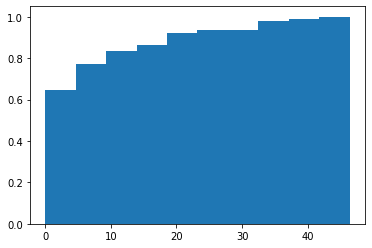

In [150]:
import matplotlib.pylab as plt

lists = sorted(order_td_idf_list.items(), key=lambda item: item[1])
x, y = zip(*lists) # unpack a list of pairs into two tuples
numBins = 10
plt.hist(y,numBins, density=True, cumulative=True)
plt.show()

In [108]:
drug_td_idf_df=pd.DataFrame.from_dict(drug_td_idf, orient='index')
drug_td_idf_df=drug_td_idf_df.T

In [109]:
order_td_idf_df=pd.DataFrame.from_dict(order_td_idf, orient='index')
order_td_idf_df=order_td_idf_df.T

In [110]:
result = pd.concat([order_td_idf_df, drug_td_idf_df], axis=1, join='inner')

In [123]:
from sklearn import cluster
from sklearn.cluster import MiniBatchKMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
mat = result.values
# Using sklearn
km = cluster.KMeans(n_clusters=6,random_state=3425)
km.fit(mat)
# Get cluster assignment labels
labels = km.labels_
# Format results as a DataFrame
results = pd.DataFrame([result.index,labels]).T

In [154]:
from sklearn import cluster
from sklearn.cluster import MiniBatchKMeans
#clusters=MiniBatchKMeans(n_clusters=6, random_state=20).fit(result)
clusters=cluster.KMeans(n_clusters=14, random_state=20).fit(result)
labels = clusters.labels_
results = pd.DataFrame([result.index,labels]).T
results.groupby([1]).count()

0
1       
0    114
1     39
2      3
3    154
4      2
5   1012
6      2
7     17
8     54
9      8
10    48
11     2
12     1
13    18

Fit 2 clusters
Fit 4 clusters
Fit 6 clusters
Fit 8 clusters
Fit 10 clusters
Fit 12 clusters
Fit 14 clusters
Fit 16 clusters
Fit 18 clusters
Fit 20 clusters
Fit 22 clusters
Fit 24 clusters
Fit 26 clusters
Fit 28 clusters
Fit 30 clusters
Fit 32 clusters
Fit 34 clusters
Fit 36 clusters
Fit 38 clusters
Fit 40 clusters


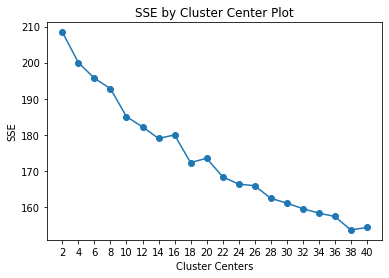

In [153]:
from sklearn.cluster import MiniBatchKMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
def find_optimal_clusters(data, max_k):
    iters = range(2, max_k+1, 2)
    
    sse = []
    for k in iters:
        #sse.append(MiniBatchKMeans(n_clusters=k, init_size=1024, batch_size=2048,random_state=20).fit(data).inertia_)
        sse.append(cluster.KMeans(n_clusters=k, random_state=20).fit(data).inertia_)
        
        print('Fit {} clusters'.format(k))
        
    f, ax = plt.subplots(1, 1)
    ax.plot(iters, sse, marker='o')
    ax.set_xlabel('Cluster Centers')
    ax.set_xticks(iters)
    ax.set_xticklabels(iters)
    ax.set_ylabel('SSE')
    ax.set_title('SSE by Cluster Center Plot')
    
find_optimal_clusters(result, 40)

In [119]:
clusters = MiniBatchKMeans(n_clusters=14, init_size=1024, batch_size=2048, random_state=20).fit_predict(result)

In [226]:
results.to_csv(path+"tfidf_kmeans10.csv", index=False)

get diagnoses, orders, and drugs observed by 90%+ of the patients

In [23]:
N=len(data)

In [24]:
diagNotusedbyall=[]
used={}
for item in diaglist:
    used[item]={}  
    for pid in data:
        stop=False
        used[item][pid]=0
        for date in data[pid]['appt']:
            for i in data[pid]['appt'][date]['diag']:
                if i==item:
                    used[item][pid]=1
                    stop=True
                    break
            if stop==True:
                break
    if sum(used[item].values())>N*0.3 : #used by more than 30% of patients
        diagNotusedbyall.append(item)       

In [25]:
diagNotusedbyall

['R06.02', 'I50.9', 'N17.9']

In [47]:
orderNotusedbyall=[]
used={}
for item in orderlist:
    used[item]={}  
    for pid in data:
        stop=False
        used[item][pid]=0
        for date in data[pid]['appt']:
            for i in data[pid]['appt'][date]['proc']:
                if i==item:
                    used[item][pid]=1
                    stop=True
                    break
            if stop==True:
                break
    if sum(used[item].values())>N*0.5 : #used by more than 30% of patients
        orderNotusedbyall.append(item)           

In [48]:
orderNotusedbyall

['ECG/12 Lead-POC ED',
 'Commonly Used Orders - AM Draw',
 'Lab_order',
 'IV, Peripheral Access']

In [45]:
drugNotusedbyall=[]
used={}
for item in druglist:
    used[item]={}  
    for pid in data:
        stop=False
        used[item][pid]=0
        for date in data[pid]['appt']:
            for i in data[pid]['appt'][date]['drug']:
                if i==item:
                    used[item][pid]=1
                    stop=True
                    break
            if stop==True:
                break
    if sum(used[item].values())>N*0.5 : #used by more than 30% of patients
        drugNotusedbyall.append(item)     

In [46]:
drugNotusedbyall

['Docusate Sodium Cap', 'Furosemide Inj', 'Heparin Inj']

In [225]:
# drugNotusedbyall=[]
# for item in druglist:
#     used=0
#     for pid in data:
#         for date in data[pid]['appt']:
#             for i in data[pid]['appt'][date]['drug']:
#                 if i==item:
#                     used+=1
    
#     if used>500 :
#         drugNotusedbyall.append(item)       

In [30]:
for pid in data:
    for date in sorted(iter(data[pid]['appt'])):
        data[pid]['appt'][date]['type'] = 'I'

In [31]:
data2 = deepcopy(data)

re-labeling orders

In [33]:
for pid in data:
    for date in sorted(data[pid]['appt']):
        data2[pid]['appt'][date]['diag'] = []
        data2[pid]['appt'][date]['proc'] = []
        data2[pid]['appt'][date]['drugclass'] = []
        data2[pid]['appt'][date]['drug'] = []
        data2[pid]['appt'][date]['user']=[]
#         for icd in range(len(data[pid]['appt'][date]['diag'])):
#             if data[pid]['appt'][date]['diag'][icd] in diagNotusedbyall and data[pid]['appt'][date]['diag'][icd] not in data2[pid]['appt'][date]['diag']: #ADD ONLY DIAGNOSIS THAT WE WANT
#                 data2[pid]['appt'][date]['diag'].append(data[pid]['appt'][date]['diag'][icd])

        for icd in range(len(data[pid]['appt'][date]['proc'])):
            if data[pid]['appt'][date]['proc'][icd] in orderNotusedbyall and data[pid]['appt'][date]['proc'][icd] not in data2[pid]['appt'][date]['proc']:
                if data[pid]['appt'][date]['proc'][icd]=='AM Lab Order Set' or data[pid]['appt'][date]['proc'][icd]=='CTS AM Labs Order Set':
                    data2[pid]['appt'][date]['proc'].append('Commonly Used Orders - AM Draw')
                elif data[pid]['appt'][date]['proc'][icd]=='Lab_order':
                    pass
                else:
                    data2[pid]['appt'][date]['proc'].append(str(data[pid]['appt'][date]['proc'][icd]))
                data2[pid]['appt'][date]['proc']=list(set(data2[pid]['appt'][date]['proc']))
#             if data[pid]['appt'][date]['proc'][icd]== 'Clinical Pathway - Heart Failure Order Set':
#                 data2[pid]['appt'][date]['proc'].append(str(data[pid]['appt'][date]['proc'][icd]))
#             if data[pid]['appt'][date]['proc'][icd]==  'Clinical Pathway - Heart Failure Order Set (LMH)':
#                 data2[pid]['appt'][date]['proc'].append('Clinical Pathway - Heart Failure Order Set')
                
#             if data[pid]['appt'][date]['proc'][icd]==  'ED Order set - Dyspnea/CHF/COPD/Asthma':
#                 data2[pid]['appt'][date]['proc'].append(str(data[pid]['appt'][date]['proc'][icd]))
#             if data[pid]['appt'][date]['proc'][icd]==   'ED Order set - Dyspnea/CHF/COPD/Asthma (LMH)':
#                 data2[pid]['appt'][date]['proc'].append('ED Order set - Dyspnea/CHF/COPD/Asthma')

        for icd in range(len(data[pid]['appt'][date]['drug'])):
            if data[pid]['appt'][date]['drug'][icd] in drugNotusedbyall and data[pid]['appt'][date]['drug'][icd] not in data2[pid]['appt'][date]['drugclass']:
                if str(data[pid]['appt'][date]['drug'][icd])== 'Furosemide Inj' or str(data[pid]['appt'][date]['drug'][icd])== 'Furosemide Oral':
                    data2[pid]['appt'][date]['drugclass'].append('Furosemide')
                    
                elif str(data[pid]['appt'][date]['drug'][icd])==  'Insulin Aspart Prandial Scale Pre-Meal' or str(data[pid]['appt'][date]['drug'][icd])==  'Insulin Aspart Bedtime Scale':
                    data2[pid]['appt'][date]['drugclass'].append('Insulin Aspart')
                elif str(data[pid]['appt'][date]['drug'][icd])==  'Potassium Chloride Inj' or str(data[pid]['appt'][date]['drug'][icd])==  'Potassium Chloride Oral':
                    data2[pid]['appt'][date]['drugclass'].append('Potassium Chloride') 
                else:
                    data2[pid]['appt'][date]['drugclass'].append(data[pid]['appt'][date]['drug'][icd])
                    
                data2[pid]['appt'][date]['drugclass']=list(set(data2[pid]['appt'][date]['drugclass']))

#         for u in data[pid]['appt'][date]['user']:
#             if u in Q1 and 'Q1' not in data2[pid]['appt'][date]['user']:
#                 data2[pid]['appt'][date]['user'].append('Q1')
#             if u in Q3 and 'Q3' not in data2[pid]['appt'][date]['user']:
#                 data2[pid]['appt'][date]['user'].append('Q3')

In [44]:
pidcount=[]
for pid in data2:
    for date in data2[pid]['appt']:
        if len(data2[pid]['appt'][date]['drugclass'])>0 or len(data2[pid]['appt'][date]['proc'])>0:
            pidcount.append(pid)
            print(pid)
#             print(data2[pid]['appt'][date]['drugclass'],data2[pid]['appt'][date]['proc'])
pidcount=list(set(pidcount))
print(len(pidcount))

556943700270
556943700270
556943700270
556943700270
556943700270
556943700270
556943700270
556943700270
556943700270
556943700270
561002000270
561002000270
561002000270
561002000270
562000000270
562000000270
562000000270
562000000270
562000000270
562000000270
562000000270
562000000270
562000000270
562000000270
562000000270
567313100270
567313100270
567313100270
567313100270
567313100270
567313100270
567313100270
567313100270
567313100270
567313100270
567313100270
567313100270
567313100270
567313100270
567313100270
567313100270
567313100270
567313100270
567313100270
567313100270
567313100270
567313100270
567313100270
567313100270
567313100270
567313100270
567313100270
567313100270
567313100270
567313100270
567313100270
567313100270
567313100270
567313100270
567313100270
567313100270
567313100270
567313100270
567313100270
567313100270
567313100270
567313100270
567313100270
567313100270
567313100270
567313100270
567313100270
567313100270
567313100270
567313100270
567313100270
567313100270

818159400270
818159400270
818159400270
818159400270
818159400270
818159400270
818159400270
818159400270
818159400270
818159400270
818159400270
818159400270
818159400270
818159400270
818159400270
818159400270
818159400270
818159400270
818159400270
818159400270
818159400270
818159400270
818159400270
818159400270
818159400270
818159400270
818159400270
818159400270
818159400270
818159400270
818159400270
818159400270
818159400270
818159400270
818159400270
818159400270
818159400270
818159400270
818159400270
818159400270
818159400270
818159400270
818159400270
818159400270
818159400270
818159400270
818159400270
818159400270
818159400270
818265700270
818265700270
818265700270
818265700270
818265700270
818265700270
818265700270
818265700270
818265700270
818265700270
818265700270
818265700270
818265700270
818265700270
818265700270
818265700270
818265700270
818265700270
818265700270
818265700270
818265700270
818265700270
818562800270
818562800270
818562800270
818562800270
818562800270
818562800270

865469300270
865469300270
865469300270
865469300270
865469300270
865469300270
865469300270
865469300270
865469300270
865469300270
865469300270
865469300270
865469300270
865469300270
865469300270
865469300270
865469300270
865469300270
865469300270
865469300270
865469300270
865469300270
865469300270
865510000270
865510000270
865510000270
865510000270
865510000270
865510000270
865510000270
865510000270
866199600270
866199600270
866199600270
866199600270
866199600270
866199600270
866199600270
866199600270
866199600270
866199600270
866199600270
866199600270
866199600270
866199600270
866199600270
866199600270
866199600270
866209100270
866209100270
866209100270
866209100270
866253300270
866253300270
866253300270
866253300270
866253300270
866253300270
866253300270
866253300270
866253300270
866253300270
866253300270
866582700270
866582700270
866582700270
866582700270
866582700270
866582700270
866582700270
866582700270
866772900270
866772900270
866772900270
866857900270
866857900270
866857900270

916582800270
916582800270
916582800270
916582800270
916582800270
916582800270
916582800270
916582800270
916582800270
916586600270
916586600270
916586600270
916586600270
916586600270
916586600270
916586600270
917474000270
917474000270
917474000270
917474000270
917474000270
917474000270
917474000270
917474000270
917474000270
917474000270
917474000270
917474000270
917474000270
917474000270
917474000270
917474000270
917474000270
917474000270
917474000270
917474000270
917474000270
917474000270
917474000270
917474000270
917474000270
917474000270
917945600270
917945600270
917945600270
917945600270
917945600270
917945600270
917945600270
917945600270
917945600270
917945600270
917945600270
917945600270
917945600270
917945600270
917945600270
917945600270
917945600270
917945600270
917945600270
917945600270
917945600270
917945600270
917945600270
917945600270
917945600270
917945600270
917945600270
917945600270
917945600270
917945600270
917945600270
917945600270
917945600270
917945600270
917945600270

952264600270
952665700270
952665700270
952665700270
952665700270
952665700270
952665700270
952691500270
952691500270
952691500270
952691500270
952691500270
952691500270
953022700270
953022700270
953022700270
953022700270
953022700270
953022700270
953022700270
953022700270
953022700270
953022700270
953022700270
953022700270
953022700270
953022700270
953022700270
953022700270
953124100270
953124100270
953124100270
953124100270
953124100270
953124100270
953124100270
953124100270
953124100270
953124100270
953124100270
953124100270
953124100270
953124100270
953124100270
953124100270
953124100270
953124100270
953124100270
953124100270
953124100270
953124100270
953124100270
953124100270
953124100270
953124100270
953124100270
953124100270
953124100270
953124100270
953124100270
953124100270
953124100270
953124100270
953124100270
953124100270
953124100270
953124100270
953124100270
953124100270
953230900270
953230900270
953230900270
953230900270
953230900270
953230900270
953230900270
953230900270

1006200000270
1006200000270
1006200000270
1006200000270
1006200000270
1006200000270
1006200000270
1006200000270
1006200000270
1006200000270
1006200000270
1006200000270
1006200000270
1006200000270
1006200000270
1006200000270
1006200000270
1006200000270
1006200000270
1006200000270
1006200000270
1006200000270
1006200000270
1006200000270
1006200000270
1006200000270
1006200000270
1006200000270
1006200000270
1006200000270
1006200000270
1006200000270
1006200000270
1006200000270
1006200000270
1006200000270
1006200000270
1006200000270
1006200000270
1006200000270
1006200000270
1006200000270
1006200000270
1006200000270
1006200000270
1006200000270
1006200000270
1006200000270
1006200000270
1006200000270
1006200000270
1006200000270
1006200000270
1006200000270
1006200000270
1006200000270
1006200000270
1006200000270
1006200000270
1006200000270
1006200000270
1006200000270
1006200000270
1006200000270
1006200000270
1006218700270
1006218700270
1006218700270
1006218700270
1006218700270
1006218700270
100621

1056251800270
1056251800270
1056251800270
1056251800270
1056251800270
1056251800270
1056251800270
1056251800270
1056251800270
1056251800270
1056251800270
1056251800270
1056251800270
1056251800270
1056251800270
1056251800270
1056251800270
1056251800270
1056251800270
1056251800270
1056251800270
1056251800270
1056251800270
1056251800270
1056251800270
1056251800270
1056251800270
1056251800270
1056251800270
1056251800270
1056251800270
1056251800270
1056251800270
1056251800270
1056251800270
1056251800270
1056251800270
1056251800270
1056251800270
1056251800270
1056251800270
1056251800270
1056577800270
1056577800270
1056577800270
1056577800270
1056577800270
1056577800270
1056577800270
1057182600270
1057182600270
1057182600270
1057182600270
1057182600270
1057182600270
1057182600270
1057182600270
1057182600270
1057182600270
1057182600270
1057182600270
1057182600270
1057182600270
1057182600270
1057182600270
1057337400270
1057337400270
1057337400270
1057337400270
1057337400270
1057337400270
105794

1105913400270
1105932200270
1105932200270
1105932200270
1105932200270
1105932200270
1105932200270
1105932200270
1105932200270
1105932200270
1105932200270
1105932200270
1105932200270
1105932200270
1105932200270
1105932200270
1105932200270
1105932200270
1105932200270
1105932200270
1105932200270
1105932200270
1105932200270
1105932200270
1105952800270
1105952800270
1105952800270
1105952800270
1105952800270
1105952800270
1105952800270
1105952800270
1105952800270
1105952800270
1105974500270
1105974500270
1105974500270
1105974500270
1105974500270
1105974500270
1105974500270
1105974500270
1105974500270
1105974500270
1105974500270
1105974500270
1105974500270
1105974500270
1105974500270
1105974500270
1105974500270
1105974500270
1105974500270
1105974500270
1105974500270
1105974500270
1105974500270
1105974500270
1105974500270
1105974500270
1105974500270
1105974500270
1105974500270
1105974500270
1105974500270
1105974500270
1105974500270
1105974500270
1105974500270
1105974500270
1106024800270
110602

1161166900270
1161166900270
1161166900270
1161166900270
1161193900270
1161193900270
1161193900270
1161193900270
1161193900270
1161193900270
1161193900270
1161193900270
1161193900270
1161193900270
1161193900270
1161193900270
1161193900270
1161193900270
1161193900270
1161193900270
1161193900270
1161193900270
1161193900270
1161193900270
1161193900270
1161193900270
1161193900270
1161193900270
1161193900270
1161193900270
1161193900270
1161193900270
1161193900270
1161193900270
1161515900270
1161515900270
1161515900270
1161515900270
1161515900270
1161877700270
1161877700270
1161877700270
1161877700270
1161877700270
1161877700270
1161877700270
1161877700270
1161877700270
1161877700270
1161877700270
1161877700270
1161877700270
1161877700270
1161877700270
1161877700270
1161877700270
1161877700270
1161877700270
1161877700270
1161877700270
1161877700270
1161877700270
1161877700270
1161877700270
1161881700270
1161881700270
1161881700270
1161881700270
1161881700270
1161881700270
1161881700270
116188

1224183400270
1224183400270
1224183400270
1224183400270
1224183400270
1224183400270
1224183400270
1224183400270
1224221600270
1224221600270
1224221600270
1224221600270
1224221600270
1224221600270
1224221600270
1224221600270
1224221600270
1224221600270
1224756700270
1224756700270
1224756700270
1224756700270
1224756700270
1224756700270
1224756700270
1224756700270
1224756700270
1224756700270
1224756700270
1224756700270
1224756700270
1224756700270
1224756700270
1224756700270
1224756700270
1224756700270
1225166800270
1225166800270
1225166800270
1225166800270
1225166800270
1225166800270
1225166800270
1225166800270
1225166800270
1225166800270
1225166800270
1225166800270
1225166800270
1225166800270
1225166800270
1225166800270
1225166800270
1225181100270
1225181100270
1225181100270
1225181100270
1225181100270
1225181100270
1225181100270
1225181100270
1225181100270
1225181100270
1225181100270
1225771000270
1225771000270
1226275500270
1226275500270
1226275500270
1226275500270
1226275500270
122627

1271703900270
1271703900270
1271734400270
1271734400270
1271734400270
1271803700270
1271803700270
1271803700270
1271803700270
1271803700270
1271803700270
1271803700270
1271803700270
1271803700270
1271803700270
1271803700270
1271803700270
1271803700270
1272344700270
1272344700270
1272344700270
1272344700270
1272344700270
1272344700270
1272344700270
1272344700270
1272344700270
1272408600270
1272408600270
1272408600270
1272408600270
1272408600270
1272408600270
1273735100270
1273735100270
1273735100270
1273735100270
1273735100270
1273735100270
1273735100270
1273735100270
1273735100270
1273735100270
1273735100270
1273735100270
1273735100270
1273899200270
1273899200270
1273899200270
1273899200270
1273899200270
1273899200270
1273899200270
1274504100270
1274504100270
1274504100270
1274504100270
1274504100270
1274504100270
1274664700270
1274664700270
1274664700270
1274664700270
1274664700270
1274664700270
1274664700270
1274664700270
1274664700270
1274664700270
1274664700270
1274664700270
127466

In [42]:
len(data2)

1701

In [37]:
JSON_FILE = os.path.expanduser(path+"EDDC_HF_data_filtered_OS.json")

with open(JSON_FILE, 'w') as outfile:
    json.dump(data2, outfile, indent=2, sort_keys=True, separators=(',', ': '))


In [38]:
pickle_out = open(path + 'EDDC_HF_data_filtered_OS.pickle', 'wb')
pickle.dump(data2, pickle_out)
pickle_out.close()

#get number of users for patients who appeared in data2, if patient is seen by >1 user, remove. Else, categorize patient as treated by high/low users

In [287]:
piduser={}
for pid in data2:
    piduser[pid]=[]
    for date in data2[pid]['appt']:
        for i in data2[pid]['appt'][date]['user']:
            piduser[pid].append(i)
    if len(piduser[pid])>0:
        piduser[pid]=list(set(piduser[pid]))

In [288]:
piduser

{'9000556943700270': ['Q3', 'Q1'],
 '9000561002000270': ['Q1'],
 '9000562000000270': ['Q3', 'Q1'],
 '9000567313100270': ['Q3', 'Q1'],
 '9000579333200270': ['Q3', 'Q1'],
 '9000582002300270': ['Q3', 'Q1'],
 '9000584744300270': ['Q3', 'Q1'],
 '9000608150700270': ['Q3', 'Q1'],
 '9000624731800270': ['Q3', 'Q1'],
 '9000624817200270': ['Q3', 'Q1'],
 '9000653284000270': ['Q3', 'Q1'],
 '9000684111000270': ['Q3', 'Q1'],
 '9000685526500270': ['Q1'],
 '9000737643900270': ['Q3', 'Q1'],
 '9000763338100270': ['Q3', 'Q1'],
 '9000763976700270': [],
 '9000766032300270': ['Q3'],
 '9000768628200270': ['Q3', 'Q1'],
 '9000771224000270': ['Q3', 'Q1'],
 '9000774599200270': ['Q1'],
 '9000778172900270': ['Q1'],
 '9000778912000270': ['Q1'],
 '9000781162000270': ['Q3', 'Q1'],
 '9000786831400270': ['Q3', 'Q1'],
 '9000787961400270': ['Q3', 'Q1'],
 '9000789394000270': ['Q3'],
 '9000789853200270': ['Q3'],
 '9000790112500270': ['Q3', 'Q1'],
 '9000790635800270': [],
 '9000791127000270': [],
 '9000791130400270': ['Q1'],

In [289]:
piduser2=deepcopy(piduser)
for pid in piduser:
    if len(piduser[pid])==1:
        pass
    else:
        del piduser2[pid]
print(len(piduser2))

515


In [292]:
for pid in piduser2:
    print (pid,piduser2[pid][0])

9000561002000270 Q1
9000685526500270 Q1
9000766032300270 Q3
9000774599200270 Q1
9000778172900270 Q1
9000778912000270 Q1
9000789394000270 Q3
9000789853200270 Q3
9000791130400270 Q1
9000793251400270 Q3
9000795313200270 Q1
9000795789100270 Q1
9000796870000270 Q3
9000797214500270 Q3
9000797234500270 Q1
9000798001600270 Q3
9000799591100270 Q3
9000799604300270 Q1
9000802079000270 Q3
9000802639200270 Q1
9000802645200270 Q3
9000805374100270 Q1
9000806399800270 Q3
9000806970700270 Q3
9000810004400270 Q3
9000810691100270 Q3
9000810813400270 Q1
9000811449800270 Q3
9000811451200270 Q3
9000811457500270 Q1
9000811459800270 Q1
9000812526300270 Q3
9000812774200270 Q3
9000813503900270 Q3
9000815445200270 Q3
9000817506800270 Q1
9000818100500270 Q3
9000818562800270 Q3
9000822182700270 Q3
9000822570100270 Q1
9000826079200270 Q1
9000826527800270 Q3
9000826626700270 Q1
9000827067100270 Q1
9000827266000270 Q3
9000831270400270 Q1
9000831699300270 Q1
9000833289200270 Q1
9000833302600270 Q3
9000835209400270 Q3


In [46]:
data_1Q = deepcopy(data2)
for pid in data2:
    if pid in piduser2:
        if piduser2[pid]==['Q1']:
            pass
        else:
            del data_1Q[pid]
    else:
        del data_1Q[pid]

In [47]:
data_3Q = deepcopy(data2)
for pid in data2:
    if pid in piduser2:
        if piduser2[pid]==['Q3']:
            pass
        else:
            del data_3Q[pid]
    else:
        del data_3Q[pid]

In [48]:
print(len(data_1Q),len(data_3Q))

189 330


In [49]:
#only have HF as diagnosis, got from getSourceData.ipynb
HFlist=[9001251915900270,9001216906000270,9001121093200270,9001173168800270,9001211775200270,9001246400900270,9001220441100270,9001174426900270,9001247254900270,9001109270200270,9001176608700270,9001241780400270,9001234306600270,9001206891600270,9001179229100270,9001265609400270,9001148298400270,9001282931300270,9001246979700270,9001236154600270,9001232695300270,9001283883400270,9001225771000270,9001180467800270,9001235742900270,9001140573400270,9001262036300270,9001277843700270,9001191425900270,9001170806400270,9001143998000270,9001115258800270,9001251701600270,9001189761100270,9001172050300270,9001213409300270,9001174120900270,9001269084300270,9001192844000270,9001187189200270,9001127051300270,9001145898800270,9001241929400270,9001157423500270,9001281548600270,9001277336200270,9001153999000270,9001124832900270,9001103203000270,9001197850700270,9001122106400270,9001183064500270,9001229215400270,9001190326000270,9001283307400270,9001247873000270,9001271734400270,9001137168300270,9001176846300270,9001219793500270,9001205152300270,9001224174300270,9001180232100270,9001162665900270,9001280700600270,9001122902200270,9001283296000270,9001231182100270,9001175917800270,9001118690900270,9001198997800270,9001199107500270,9001257904300270,9001241691500270,9001217549800270,9001133189700270,9001130637700270,9001139094600270,9001134950300270,9001135748000270,9001208316600270,9001139543800270,9001164070700270,9001250210700270,9001161881700270,9001183117300270,9001169276400270,9001188841900270,9001170830800270,9001175772200270,9001175857400270,9001239669600270,9001173008500270,9001176464400270,9001179229900270,9001134997500270,9001213095600270,9001212260100270,9001190777500270,9001261274500270,9001192647900270,9001221808200270,9001204705400270,9001212284600270,9001213056600270,9001226275500270,9001236382900270,9001238991200270,9001234738100270,9001240443800270,9001282946900270,9001260567600270,9001171950100270,9001185043000270,9001256154500270,9001272344700270,9001217202600270,9001273899200270,9001209675100270,9001231430000270,9001124571900270,9001161193900270,9001284903800270,9001144030000270,9001127460400270,9001284311200270,9001142706400270,9001152684100270,9001146841500270]

In [50]:
s=0
l=0
for pid in data2:
#     if int(pid) in HFlist:
        s=s+data2[pid]['90day_readmit']
        l=l+data2[pid]['LOS']
print(s,l/len(data2))

91 11.652950310559007


compare readmission outcome and LOS across patients treated by high/low users

In [51]:
s=0
l=0
for pid in data_1Q:
#     if int(pid) in HFlist:
        s=s+data_1Q[pid]['90day_readmit']
        l=l+data_1Q[pid]['LOS']
print(s,l/len(data_1Q))

18 9.063492063492063


In [52]:
s=0
l=0
for pid in data_3Q:
#     if int(pid) in HFlist:
        s=s+data_3Q[pid]['90day_readmit']
        l=l+data_3Q[pid]['LOS']
print(s,l/len(data_3Q))

26 6.666666666666667


In [409]:
#all orders for EDDC_18_89, for Disco
with open(path+'orders_EDDC_18_89_2012_2018.csv', 'w') as csv_file:
    writer = csv.writer(csv_file, delimiter=',')
    combined_row = []
    combined_row.append('pid')
    combined_row.append('date')
    combined_row.append('activity')
    combined_row.append('user')
    writer.writerow(combined_row)
    for pid in data2:
#         if int(pid) in HFlist:
                for date in data2[pid]['appt']:
                    if len(data2[pid]['appt'][date]['proc'])>0 or len(data2[pid]['appt'][date]['drug'])>0:
                        combined_row = []
                        combined_row.append(pid)
                        #combined_row.append('@')
                        combined_row.append(date)
                        #combined_row.append('@')
                        combined_row.append(str(sorted(data2[pid]['appt'][date]['proc']))+str(sorted(data2[pid]['appt'][date]['drug'])))
                        combined_row.append(data2[pid]['appt'][date]['user'])
                        writer.writerow(combined_row)

In [104]:
#only patients treated by low users, for Disco, change Q1 to Q3 for high users
with open('Q1_orders_EDDC_HFonly_18_89.csv', 'w') as csv_file:
    writer = csv.writer(csv_file, delimiter=',')
    combined_row = []
    combined_row.append('pid')
    combined_row.append('date')
    combined_row.append('activity')
    combined_row.append('user')
    writer.writerow(combined_row)
    for pid in data2:
        if int(pid) in HFlist and pid in piduser2:
            if piduser2[pid]==['Q1']:
                for date in data2[pid]['appt']:
                    if len(data2[pid]['appt'][date]['proc'])>0 or len(data2[pid]['appt'][date]['drug'])>0:
                        combined_row = []
                        combined_row.append(pid)
                        #combined_row.append('@')
                        combined_row.append(date)
                        #combined_row.append('@')
                        combined_row.append(str(sorted(data2[pid]['appt'][date]['proc']))+str(sorted(data2[pid]['appt'][date]['drug'])))
                        combined_row.append(data2[pid]['appt'][date]['user'])
                        writer.writerow(combined_row)
                

In [114]:
#SPADE on all orders for EDDC_18_89
with open(path+'SPADE_orders_EDDC_HFonly_18_89.csv', 'w') as csv_file:
    writer = csv.writer(csv_file, delimiter=',')
    writer.writerow(combined_row)
    for pid in data2:
        if int(pid) in HFlist:
            n=0
            for date in data2[pid]['appt']:
                if len(data2[pid]['appt'][date]['proc'])>0 or len(data2[pid]['appt'][date]['drug'])>0:
                    n=n+1
                    combined_row = []
                    combined_row.append(pid)
                    #combined_row.append('@')
                    combined_row.append(n)
                    #combined_row.append('@')
                    combined_row.append('1')
                    combined_row.append(str(sorted(data2[pid]['appt'][date]['proc']))+str(sorted(data2[pid]['appt'][date]['drug'])))
                    writer.writerow(combined_row)

In [54]:
#optional, subgroup for patients with HF diagnosis only
data_18_89_HFonly_EDDC = deepcopy(data2)
for pid in data2:
    if int(pid) in HFlist:
        pass
    else:
        del data_18_89_HFonly_EDDC[pid]

In [55]:
len(data_18_89_HFonly_EDDC)

67

In [597]:
pickle_out = open(path + 'data_18_89_EDDC_2012_2018.pickle', 'wb')
pickle.dump(data, pickle_out)
pickle_out.close()


In [ ]:
for pid in data2:
    print(pid,data2[pid]['30day_readmit'],data2[pid]['60day_readmit'],data2[pid]['90day_readmit'],data2[pid]['LOS'],data2[pid]['dischargedisposition'])

In [280]:
cluster=pd.read_excel('/Users/yiyezhang/Dropbox/Grant-and-IRB/AHRQ R03/Analysis/EDDC_order_2012_2018_cluster_MED.xlsx', sheetname='EDDC_order_2012_2018_cluster')

/Users/yiyezhang/anaconda3/lib/python3.7/site-packages/pandas/util/_decorators.py:188: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  return func(*args, **kwargs)


generate cluster-specific data for Disco, once you run LCS_clustering.R

In [650]:
#data2: filtered
#data: all
with open(path+'C1_orders_EDDC_HFonly_18_89_6clusters_all.csv', 'w') as csv_file:
    writer = csv.writer(csv_file, delimiter=',')
    combined_row = []
    combined_row.append('pid')
    combined_row.append('date')
    combined_row.append('activity')
    combined_row.append('user')
    writer.writerow(combined_row)
    for pid in data:
        if  int(pid) in cluster['clientvisitguid'].values:
#             print(pid,cluster.loc[cluster['clientvisitguid']==int(pid)][['cluster']].values[0])
            if cluster.loc[cluster['clientvisitguid']==int(pid)][['cluster6']].values[0]==1:
                for date in data[pid]['appt']:
                    if len(data[pid]['appt'][date]['proc'])>0 or len(data[pid]['appt'][date]['drug'])>0:
                        combined_row = []
                        combined_row.append(pid)
                        #combined_row.append('@')
                        combined_row.append(date)
                        #combined_row.append('@')
                        combined_row.append(str(sorted(data[pid]['appt'][date]['proc']))+str(sorted(data[pid]['appt'][date]['drug'])))
                        combined_row.append(data[pid]['appt'][date]['user'])
                        writer.writerow(combined_row)
                

In [ ]:
#can skip
for pid in data2:
    os=0
    for date in data2[pid]['appt']:
        if  'Clinical Pathway - Heart Failure Order Set (LMH)' in data2[pid]['appt'][date]['proc'] or 'Clinical Pathway - Heart Failure Order Set' in data2[pid]['appt'][date]['proc'] or  'ED Order set - Dyspnea/CHF/COPD/Asthma (LMH)' in data2[pid]['appt'][date]['proc'] or  'ED Order set - Dyspnea/CHF/COPD/Asthma' in data2[pid]['appt'][date]['proc']:
            os=1
            break
    print(pid,os)  

In [61]:
#common drugs in cluster 2
diaglistC2=[]
for pid in data:
    if  int(pid) in cluster['clientvisitguid'].values:
        if cluster.loc[cluster['clientvisitguid']==int(pid)][['cluster6']].values[0]==2:
            for date in data[pid]['appt']:
                for icd in data[pid]['appt'][date]['diag']:
                    diaglistC2.append(icd)
c=Counter(diaglistC2)
c_most_common = [item for item in c.most_common(20)]

In [62]:
c_most_common

[('I50.9', 183),
 ('N17.9', 107),
 ('I48.91', 95),
 ('I10', 89),
 ('D64.9', 72),
 ('R06.02', 71),
 ('I50.23', 69),
 ('I50.33', 68),
 ('J18.9', 53),
 ('E11.9', 46),
 ('I50.21', 42),
 ('I25.10', 42),
 ('R07.9', 38),
 ('R09.02', 37),
 ('A41.9', 34),
 ('R53.1', 34),
 ('R06.00', 33),
 ('E87.1', 32),
 ('I50.30', 32),
 ('R41.82', 32)]

In [63]:
orderlistC3=[]
for pid in data2:
    if  int(pid) in cluster['clientvisitguid'].values:
        if cluster.loc[cluster['clientvisitguid']==int(pid)][['cluster']].values[0]==3:
            for date in data2[pid]['appt']:
                for icd in data2[pid]['appt'][date]['proc']:
                    orderlistC3.append(icd)
c=Counter(orderlistC3)
c_most_common = [item for item in c.most_common(20)]

In [64]:
c_most_common

[('Commonly Used Orders - AM Draw', 4054),
 ('Heparin  Drip Order Set (Adult)', 875),
 ('Warfarin Order Set', 566)]

In [65]:
druglistC3=[]
for pid in data2:
    if  int(pid) in cluster['clientvisitguid'].values:
        if cluster.loc[cluster['clientvisitguid']==int(pid)][['cluster']].values[0]==3:
            for date in data2[pid]['appt']:
                for icd in data2[pid]['appt'][date]['drug']:
                    druglistC3.append(icd)
c=Counter(druglistC3)
c_most_common = [item for item in c.most_common(20)]

In [66]:
c_most_common

[('Potassium Chloride', 1662),
 ('Magnesium Sulfate Inj', 1412),
 ('Warfarin Sodium Oral', 1374),
 ('Potassium Chloride Oral', 1121),
 ('Heparin Drip', 1097),
 ('Furosemide', 1093),
 ('Bumetanide Inj', 994),
 ('Magnesium Oxide Oral', 946),
 ('Furosemide Inj', 919),
 ('Potassium Chloride Inj', 644),
 ('HYDROmorphone Inj', 551),
 ('Potassium Chloride Oral Liq', 353),
 ('Insulin Aspart', 343),
 ('Insulin Aspart Prandial Scale Pre-Meal', 335),
 ('Calcium Gluconate Inj', 301),
 ('Metolazone Oral', 294),
 ('Insulin Aspart Bedtime Scale', 282),
 ('Bumetanide DRIP', 276),
 ('Acetaminophen Tab', 272),
 ('Metoprolol Tartrate Tab', 269)]

In [68]:
print(len(orderlist),len(orderNotusedbyall))
print(len(druglist),len(drugNotusedbyall))
print(len(diaglist),len(diagNotusedbyall))

161 6
1114 13
1492 1


below are list for CCW: https://www2.ccwdata.org/web/guest/condition-categories, ask Yufang for code

In [257]:
obesity=['DXE66.01'	,
'E66.09'	,
'E66.1'	,
'E66.2'	,
'E66.8'	,
'E66.9'	,
'Z68.30'	,
'Z68.31'	,
'Z68.32'	,
'Z68.33'	,
'Z68.34'	,
'Z68.35'	,
'Z68.36'	,
'Z68.37'	,
'Z68.38'	,
'Z68.39'	,
'Z68.41'	,
'Z68.42'	,
'Z68.43'	,
'Z68.44'	,
'Z68.45'	,]

In [258]:
depression=['DXF31.30'	,
'F31.31'	,
'F31.32'	,
'F31.4'	,
'F31.5'	,
'F31.60'	,
'F31.61'	,
'F31.62'	,
'F31.63'	,
'F31.64'	,
'F31.75'	,
'F31.76'	,
'F31.77'	,
'F31.78'	,
'F31.81'	,
'F32.0'	,
'F32.1'	,
'F32.2'	,
'F32.3'	,
'F32.4'	,
'F32.5'	,
'F32.9'	,
'F33.0'	,
'F33.1'	,
'F33.2'	,
'F33.3'	,
'F33.40'	,
'F33.41'	,
'F33.42'	,
'F33.8'	,
'F33.9'	,
'F34.1'	,
'F43.21'	,
'F43.23'	]

In [259]:
HTN=['DXH35.031'	,
'H35.032'	,
'H35.033'	,
'H35.039'	,
'I10'	,
'I11.0'	,
'I11.9'	,
'I12.0'	,
'I12.9'	,
'I13.0'	,
'I13.10'	,
'I13.11'	,
'I13.2'	,
'I15.0'	,
'I15.1'	,
'I15.2'	,
'I15.8'	,
'I15.9'	,
'I67.4'	,
'N26.2']

In [260]:
DM=['DXE08.00'	,
'E08.01'	,
'E08.10'	,
'E08.11'	,
'E08.21'	,
'E08.22'	,
'E08.29'	,
'E08.311'	,
'E08.319'	,
'E08.321'	,
'E08.3211'	,
'E08.3212'	,
'E08.3213'	,
'E08.3219'	,
'E08.329'	,
'E08.3291'	,
'E08.3292'	,
'E08.3293'	,
'E08.3299'	,
'E08.331'	,
'E08.3311'	,
'E08.3312'	,
'E08.3313'	,
'E08.3319'	,
'E08.339'	,
'E08.3391'	,
'E08.3392'	,
'E08.3393'	,
'E08.3399'	,
'E08.341'	,
'E08.3411'	,
'E08.3412'	,
'E08.3413'	,
'E08.3419'	,
'E08.349'	,
'E08.3491'	,
'E08.3492'	,
'E08.3493'	,
'E08.3499'	,
'E08.351'	,
'E08.3511'	,
'E08.3512'	,
'E08.3513'	,
'E08.3519'	,
'E08.3521'	,
'E08.3522'	,
'E08.3523'	,
'E08.3529'	,
'E08.3531'	,
'E08.3532'	,
'E08.3533'	,
'E08.3539'	,
'E08.3541'	,
'E08.3542'	,
'E08.3543'	,
'E08.3549'	,
'E08.3551'	,
'E08.3552'	,
'E08.3553'	,
'E08.3559'	,
'E08.359'	,
'E08.3591'	,
'E08.3592'	,
'E08.3593'	,
'E08.3599'	,
'E08.36'	,
'E08.37X1'	,
'E08.37X2'	,
'E08.37X3'	,
'E08.37X9'	,
'E08.39'	,
'E08.40'	,
'E08.41'	,
'E08.42'	,
'E08.43'	,
'E08.44'	,
'E08.49'	,
'E08.51'	,
'E08.52'	,
'E08.59'	,
'E08.610'	,
'E08.618'	,
'E08.620'	,
'E08.621'	,
'E08.622'	,
'E08.628'	,
'E08.630'	,
'E08.638'	,
'E08.641'	,
'E08.649'	,
'E08.65'	,
'E08.69'	,
'E08.8'	,
'E08.9'	,
'E09.00'	,
'E09.01'	,
'E09.10'	,
'E09.11'	,
'E09.21'	,
'E09.22'	,
'E09.29'	,
'E09.311'	,
'E09.319'	,
'E09.321'	,
'E09.3211'	,
'E09.3212'	,
'E09.3213'	,
'E09.3219'	,
'E09.329'	,
'E09.3291'	,
'E09.3292'	,
'E09.3293'	,
'E09.3299'	,
'E09.331'	,
'E09.3311'	,
'E09.3312'	,
'E09.3313'	,
'E09.3319'	,
'E09.339'	,
'E09.3391'	,
'E09.3392'	,
'E09.3393'	,
'E09.3399'	,
'E09.341'	,
'E09.3411'	,
'E09.3412'	,
'E09.3413'	,
'E09.3419'	,
'E09.349'	,
'E09.3491'	,
'E09.3492'	,
'E09.3493'	,
'E09.3499'	,
'E09.351'	,
'E09.3511'	,
'E09.3512'	,
'E09.3513'	,
'E09.3519'	,
'E09.3521'	,
'E09.3522'	,
'E09.3523'	,
'E09.3529'	,
'E09.3531'	,
'E09.3532'	,
'E09.3533'	,
'E09.3539'	,
'E09.3541'	,
'E09.3542'	,
'E09.3543'	,
'E09.3549'	,
'E09.3551'	,
'E09.3552'	,
'E09.3553'	,
'E09.3559'	,
'E09.359'	,
'E09.3591'	,
'E09.3592'	,
'E09.3593'	,
'E09.3599'	,
'E09.36'	,
'E09.37X1'	,
'E09.37X2'	,
'E09.37X3'	,
'E09.37X9'	,
'E09.39'	,
'E09.40'	,
'E09.41'	,
'E09.42'	,
'E09.43'	,
'E09.44'	,
'E09.49'	,
'E09.51'	,
'E09.52'	,
'E09.59'	,
'E09.610'	,
'E09.618'	,
'E09.620'	,
'E09.621'	,
'E09.622'	,
'E09.628'	,
'E09.630'	,
'E09.638'	,
'E09.641'	,
'E09.649'	,
'E09.65'	,
'E09.69'	,
'E09.8'	,
'E09.9'	,
'E10.10'	,
'E10.11'	,
'E10.21'	,
'E10.22'	,
'E10.29'	,
'E10.311'	,
'E10.319'	,
'E10.321'	,
'E10.3211'	,
'E10.3212'	,
'E10.3213'	,
'E10.3219'	,
'E10.329'	,
'E10.3291'	,
'E10.3292'	,
'E10.3293'	,
'E10.3299'	,
'E10.331'	,
'E10.3311'	,
'E10.3312'	,
'E10.3313'	,
'E10.3319'	,
'E10.339'	,
'E10.3391'	,
'E10.3392'	,
'E10.3393'	,
'E10.3399'	,
'E10.341'	,
'E10.3411'	,
'E10.3412'	,
'E10.3413'	,
'E10.3419'	,
'E10.349'	,
'E10.3491'	,
'E10.3492'	,
'E10.3493'	,
'E10.3499'	,
'E10.351'	,
'E10.3511'	,
'E10.3512'	,
'E10.3513'	,
'E10.3519'	,
'E10.359'	,
'E10.36'	,
'E10.37X1'	,
'E10.37X2'	,
'E10.37X3'	,
'E10.37X9'	,
'E10.39'	,
'E10.40'	,
'E10.41'	,
'E10.42'	,
'E10.43'	,
'E10.44'	,
'E10.49'	,
'E10.51'	,
'E10.52'	,
'E10.59'	,
'E10.610'	,
'E10.618'	,
'E10.620'	,
'E10.621'	,
'E10.622'	,
'E10.628'	,
'E10.630'	,
'E10.638'	,
'E10.641'	,
'E10.649'	,
'E10.65'	,
'E10.69'	,
'E10.8'	,
'E10.9'	,
'E11.00'	,
'E11.01'	,
'E11.10'	,
'E11.11'	,
'E11.21'	,
'E11.22'	,
'E11.29'	,
'E11.311'	,
'E11.319'	,
'E11.321'	,
'E11.3211'	,
'E11.3212'	,
'E11.3213'	,
'E11.3219'	,
'E11.329'	,
'E11.3291'	,
'E11.3292'	,
'E11.3293'	,
'E11.3299'	,
'E11.331'	,
'E11.3311'	,
'E11.3312'	,
'E11.3313'	,
'E11.3319'	,
'E11.339'	,
'E11.3391'	,
'E11.3392'	,
'E11.3393'	,
'E11.3399'	,
'E11.341'	,
'E11.3411'	,
'E11.3412'	,
'E11.3413'	,
'E11.3419'	,
'E11.349'	,
'E11.3491'	,
'E11.3492'	,
'E11.3493'	,
'E11.3499'	,
'E11.351'	,
'E11.3511'	,
'E11.3512'	,
'E11.3513'	,
'E11.3519'	,
'E11.3521'	,
'E11.3522'	,
'E11.3523'	,
'E11.3529'	,
'E11.3531'	,
'E11.3532'	,
'E11.3533'	,
'E11.3539'	,
'E11.3541'	,
'E11.3542'	,
'E11.3543'	,
'E11.3549'	,
'E11.3551'	,
'E11.3552'	,
'E11.3553'	,
'E11.3559'	,
'E11.359'	,
'E11.3591'	,
'E11.3592'	,
'E11.3593'	,
'E11.3599'	,
'E11.36'	,
'E11.37X1'	,
'E11.37X2'	,
'E11.37X3'	,
'E11.37X9'	,
'E11.39'	,
'E11.40'	,
'E11.41'	,
'E11.42'	,
'E11.43'	,
'E11.44'	,
'E11.49'	,
'E11.51'	,
'E11.52'	,
'E11.59'	,
'E11.610'	,
'E11.618'	,
'E11.620'	,
'E11.621'	,
'E11.622'	,
'E11.628'	,
'E11.630'	,
'E11.638'	,
'E11.641'	,
'E11.649'	,
'E11.65'	,
'E11.69'	,
'E11.8'	,
'E11.9'	,
'E13.00'	,
'E13.01'	,
'E13.10'	,
'E13.11'	,
'E13.21'	,
'E13.22'	,
'E13.29'	,
'E13.311'	,
'E13.319'	,
'E13.321'	,
'E13.3211'	,
'E13.3212'	,
'E13.3213'	,
'E13.3219'	,
'E13.329'	,
'E13.3291'	,
'E13.3292'	,
'E13.3293'	,
'E13.3299'	,
'E13.331'	,
'E13.3311'	,
'E13.3312'	,
'E13.3313'	,
'E13.3319'	,
'E13.339'	,
'E13.3391'	,
'E13.3392'	,
'E13.3393'	,
'E13.3399'	,
'E13.341'	,
'E13.3411'	,
'E13.3412'	,
'E13.3413'	,
'E13.3419'	,
'E13.349'	,
'E13.3491'	,
'E13.3492'	,
'E13.3493'	,
'E13.3499'	,
'E13.351'	,
'E13.3511'	,
'E13.3512'	,
'E13.3513'	,
'E13.3519'	,
'E13.3521'	,
'E13.3522'	,
'E13.3523'	,
'E13.3529'	,
'E13.3531'	,
'E13.3532'	,
'E13.3533'	,
'E13.3539'	,
'E13.3541'	,
'E13.3542'	,
'E13.3543'	,
'E13.3549'	,
'E13.3551'	,
'E13.3552'	,
'E13.3553'	,
'E13.3559'	,
'E13.359'	,
'E13.36'	,
'E13.39'	,
'E13.40'	,
'E13.41'	,
'E13.42'	,
'E13.43'	,
'E13.44'	,
'E13.49'	,
'E13.51'	,
'E13.52'	,
'E13.59'	,
'E13.610'	,
'E13.618'	,
'E13.620'	,
'E13.621'	,
'E13.622'	,
'E13.628'	,
'E13.630'	,
'E13.638'	,
'E13.641'	,
'E13.649'	,
'E13.65'	,
'E13.69'	,
'E13.8'	,
'E13.9']

In [261]:
Ischemic=['DXI20.0'	,
'I20.1'	,
'I20.8'	,
'I20.9'	,
'I21.01'	,
'I21.02'	,
'I21.09'	,
'I21.11'	,
'I21.19'	,
'I21.21'	,
'I21.29'	,
'I21.3'	,
'I21.4'	,
'I21.A1'	,
'I21.A9'	,
'I22.0'	,
'I22.1'	,
'I22.2'	,
'I22.8'	,
'I22.9'	,
'I23.0'	,
'I23.1'	,
'I23.2'	,
'I23.3'	,
'I23.4'	,
'I23.5'	,
'I23.6'	,
'I23.7'	,
'I23.8'	,
'I24.0'	,
'I24.1'	,
'I24.8'	,
'I24.9'	,
'I25.10'	,
'I25.110'	,
'I25.111'	,
'I25.118'	,
'I25.119'	,
'I25.2'	,
'I25.3'	,
'I25.41'	,
'I25.42'	,
'I25.5'	,
'I25.6'	,
'I25.700'	,
'I25.701'	,
'I25.708'	,
'I25.709'	,
'I25.710'	,
'I25.711'	,
'I25.718'	,
'I25.719'	,
'I25.720'	,
'I25.721'	,
'I25.728'	,
'I25.729'	,
'I25.730'	,
'I25.731'	,
'I25.738'	,
'I25.739'	,
'I25.750'	,
'I25.751'	,
'I25.758'	,
'I25.759'	,
'I25.760'	,
'I25.761'	,
'I25.768'	,
'I25.769'	,
'I25.790'	,
'I25.791'	,
'I25.798'	,
'I25.799'	,
'I25.810'	,
'I25.811'	,
'I25.812'	,
'I25.82'	,
'I25.83'	,
'I25.84'	,
'I25.89'	,
'I25.9']

In [262]:
Afib=['DXI48.0'	,
'I48.1'	,
'I48.2'	,
'I48.91'	]

In [263]:
CKD=['DXA18.11'	,
'A52.75'	,
'B52.0'	,
'C64.1'	,
'C64.2'	,
'C64.9'	,
'C68.9'	,
'D30.00'	,
'D30.01'	,
'D30.02'	,
'D41.00'	,
'D41.01'	,
'D41.02'	,
'D41.10'	,
'D41.11'	,
'D41.12'	,
'D41.20'	,
'D41.21'	,
'D41.22'	,
'D59.3'	,
'E08.21'	,
'E08.22'	,
'E08.29'	,
'E08.65'	,
'E09.21'	,
'E09.22'	,
'E09.29'	,
'E10.21'	,
'E10.22'	,
'E10.29'	,
'E10.65'	,
'E11.21'	,
'E11.22'	,
'E11.29'	,
'E11.65'	,
'E13.21'	,
'E13.22'	,
'E13.29'	,
'E74.8'	,
'I12.0'	,
'I12.9'	,
'I13.0'	,
'I13.10'	,
'I13.11'	,
'I13.2'	,
'I70.1'	,
'I72.2'	,
'K76.7'	,
'M10.30'	,
'M10.311'	,
'M10.312'	,
'M10.319'	,
'M10.321'	,
'M10.322'	,
'M10.329'	,
'M10.331'	,
'M10.332'	,
'M10.339'	,
'M10.341'	,
'M10.342'	,
'M10.349'	,
'M10.351'	,
'M10.352'	,
'M10.359'	,
'M10.361'	,
'M10.362'	,
'M10.369'	,
'M10.371'	,
'M10.372'	,
'M10.379'	,
'M10.38'	,
'M10.39'	,
'M32.14'	,
'M32.15'	,
'M35.04'	,
'N00.0'	,
'N00.1'	,
'N00.2'	,
'N00.3'	,
'N00.4'	,
'N00.5'	,
'N00.6'	,
'N00.7'	,
'N00.8'	,
'N00.9'	,
'N01.0'	,
'N01.1'	,
'N01.2'	,
'N01.3'	,
'N01.4'	,
'N01.5'	,
'N01.6'	,
'N01.7'	,
'N01.8'	,
'N01.9'	,
'N02.0'	,
'N02.1'	,
'N02.2'	,
'N02.3'	,
'N02.4'	,
'N02.5'	,
'N02.6'	,
'N02.7'	,
'N02.8'	,
'N02.9'	,
'N03.0'	,
'N03.1'	,
'N03.2'	,
'N03.3'	,
'N03.4'	,
'N03.5'	,
'N03.6'	,
'N03.7'	,
'N03.8'	,
'N03.9'	,
'N04.0'	,
'N04.1'	,
'N04.2'	,
'N04.3'	,
'N04.4'	,
'N04.5'	,
'N04.6'	,
'N04.7'	,
'N04.8'	,
'N04.9'	,
'N05.0'	,
'N05.1'	,
'N05.2'	,
'N05.3'	,
'N05.4'	,
'N05.5'	,
'N05.6'	,
'N05.7'	,
'N05.8'	,
'N05.9'	,
'N06.0'	,
'N06.1'	,
'N06.2'	,
'N06.3'	,
'N06.4'	,
'N06.5'	,
'N06.6'	,
'N06.7'	,
'N06.8'	,
'N06.9'	,
'N07.0'	,
'N07.1'	,
'N07.2'	,
'N07.3'	,
'N07.4'	,
'N07.5'	,
'N07.6'	,
'N07.7'	,
'N07.8'	,
'N07.9'	,
'N08'	,
'N13.1'	,
'N13.2'	,
'N13.30'	,
'N13.39'	,
'N14.0'	,
'N14.1'	,
'N14.2'	,
'N14.3'	,
'N14.4'	,
'N15.0'	,
'N15.8'	,
'N15.9'	,
'N16'	,
'N17.0'	,
'N17.1'	,
'N17.2'	,
'N17.8'	,
'N17.9'	,
'N18.1'	,
'N18.2'	,
'N18.3'	,
'N18.4'	,
'N18.5'	,
'N18.6'	,
'N18.9'	,
'N19'	,
'N25.0'	,
'N25.1'	,
'N25.81'	,
'N25.89'	,
'N25.9'	,
'N26.1'	,
'N26.9'	,
'Q61.02'	,
'Q61.11'	,
'Q61.19'	,
'Q61.2'	,
'Q61.3'	,
'Q61.4'	,
'Q61.5'	,
'Q61.8'	,
'Q62.0'	,
'Q62.2'	,
'Q62.10'	,
'Q62.11'	,
'Q62.12'	,
'Q62.31'	,
'Q62.32'	,
'Q62.39'	,
'R94.4'	]

In [264]:
COPD=['DXJ40'	,
'J41.0'	,
'J41.1'	,
'J41.8'	,
'J42'	,
'J43.0'	,
'J43.1'	,
'J43.2'	,
'J43.8'	,
'J43.9'	,
'J44.0'	,
'J44.1'	,
'J44.9'	,
'J47.0'	,
'J47.1'	,
'J47.9'	]

In [265]:
CCW={}
for pid in data:
    CCW[pid]={}
    CCW[pid]['score']=0
    if len(data[pid]['appt']) != 0:
        for date in data[pid]['appt']:
            for i in data[pid]['appt'][date]['diag']:
                if i in CKD:
                    if 'CKD' not in CCW[pid]:
                        CCW[pid]['CKD']=1
                if i in obesity:
                    if 'obesity' not in CCW[pid]:
                        CCW[pid]['obesity']=1
                if i in depression:
                    if 'depression' not in CCW[pid]:
                        CCW[pid]['depression']=1
                if i in HTN:
                    if 'HTN' not in CCW[pid]:
                        CCW[pid]['HTN']=1
                if i in DM:
                    if 'DM' not in CCW[pid]:
                        CCW[pid]['DM']=1
                if i in Ischemic:
                    if 'Ischemic' not in CCW[pid]:
                        CCW[pid]['Ischemic']=1
                if i in Afib:
                    if 'Afib' not in CCW[pid]:
                        CCW[pid]['Afib']=1
                if i in COPD:
                    if 'COPD' not in CCW[pid]:
                        CCW[pid]['COPD']=1
for pid in CCW:
    for item in CCW[pid]:
        CCW[pid]['score']=CCW[pid][item]+CCW[pid]['score']

In [266]:
for pid in CCW:
    print (pid,CCW[pid]['score'])

9000556943700270 1
9000561002000270 0
9000562000000270 0
9000567313100270 3
9000579333200270 2
9000582002300270 3
9000584744300270 1
9000608150700270 1
9000624731800270 5
9000624817200270 1
9000653284000270 2
9000684111000270 0
9000685526500270 0
9000737643900270 2
9000763338100270 1
9000763976700270 1
9000766032300270 1
9000768628200270 3
9000771224000270 2
9000774599200270 1
9000778172900270 0
9000778912000270 2
9000781162000270 3
9000786831400270 0
9000787961400270 2
9000789394000270 2
9000789853200270 2
9000790112500270 2
9000790635800270 0
9000791127000270 2
9000791130400270 2
9000791560800270 1
9000791730100270 3
9000791835100270 5
9000792864300270 0
9000792925100270 3
9000793140600270 1
9000793251400270 2
9000793451300270 2
9000793475600270 2
9000793791700270 3
9000794515700270 4
9000795313200270 1
9000795789100270 1
9000796870000270 1
9000797101000270 2
9000797148000270 2
9000797214500270 4
9000797223000270 3
9000797234500270 1
9000797484600270 2
9000797534000270 4
900079800160

In [267]:
for pid in data:
    VTE=0
    for date in data[pid]['appt']:
        for icd in data[pid]['appt'][date]['diag']:
            if isinstance(icd, float)==False:
                if icd[0:3]=='I82':
                    VTE=1
                    break
    print(pid,VTE)

9000556943700270 0
9000561002000270 0
9000562000000270 0
9000567313100270 1
9000579333200270 0
9000582002300270 0
9000584744300270 0
9000608150700270 0
9000624731800270 0
9000624817200270 0
9000653284000270 0
9000684111000270 0
9000685526500270 1
9000737643900270 0
9000763338100270 0
9000763976700270 0
9000766032300270 0
9000768628200270 0
9000771224000270 1
9000774599200270 0
9000778172900270 0
9000778912000270 0
9000781162000270 0
9000786831400270 1
9000787961400270 0
9000789394000270 0
9000789853200270 0
9000790112500270 0
9000790635800270 0
9000791127000270 0
9000791130400270 0
9000791560800270 0
9000791730100270 0
9000791835100270 0
9000792864300270 0
9000792925100270 0
9000793140600270 0
9000793251400270 0
9000793451300270 0
9000793475600270 0
9000793791700270 0
9000794515700270 0
9000795313200270 0
9000795789100270 0
9000796870000270 0
9000797101000270 0
9000797148000270 0
9000797214500270 0
9000797223000270 0
9000797234500270 0
9000797484600270 0
9000797534000270 0
900079800160

9001267903500270 0
9001268141600270 0
9001268682700270 0
9001269084300270 0
9001270810600270 0
9001271511400270 0
9001271703900270 0
9001271734400270 0
9001271803700270 0
9001272344700270 0
9001272408600270 0
9001273735100270 0
9001273899200270 0
9001274504100270 0
9001274664700270 0
9001275185300270 0
9001275904000270 0
9001276744100270 0
9001277843700270 0
9001279481500270 0
9001279949200270 0
9001281548600270 0
9001282574700270 0
9001282870100270 0
9001282891400270 0
9001282931300270 0
9001283296000270 0
9001283883400270 0
9001284311200270 0
9001284903800270 0
9001284909400270 0
9001285016600270 0


In [277]:
for pid in data2:
    if pid=='9000967421600270':
        print(data2[pid])

{'admittime': '2017-01-17 19:00:00', 'age': 1946, 'appt': {'2017-01-17 12:00:00': {'diag': [], 'drug': [], 'lab': [], 'proc': [], 'type': 'I', 'user': [], 'drugclass': []}, '2017-01-17 13:00:00': {'diag': [], 'drug': [], 'lab': [], 'proc': [], 'type': 'I', 'user': [], 'drugclass': []}, '2017-01-17 22:00:00': {'diag': [], 'drug': [], 'lab': [], 'proc': [], 'type': 'I', 'user': [], 'drugclass': []}, '2017-01-18 16:00:00': {'diag': [], 'drug': [], 'lab': [], 'proc': [], 'type': 'I', 'user': [], 'drugclass': []}, '2017-01-18 18:00:00': {'diag': [], 'drug': [], 'lab': [], 'proc': [], 'type': 'I', 'user': [], 'drugclass': []}, '2017-01-19 11:00:00': {'diag': [], 'drug': [], 'lab': [], 'proc': [], 'type': 'I', 'user': [], 'drugclass': []}, '2017-01-20 13:00:00': {'diag': [], 'drug': [], 'lab': [], 'proc': [], 'type': 'I', 'user': [], 'drugclass': []}}, 'clientID': 9000244749000200, 'dischargedisposition': 'ROUTINE/HOME', 'dischargetime': '2017-01-20 18:00:00', 'ethnicity': 'U', 'language': 'E